In [169]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
from sklearn.model_selection import train_test_split

In [170]:
df = pd.read_csv("data.csv")
df

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,Ex,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,NaN,Attchd,2003.0,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,NaN,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,Ex,Y,SBrkr,1262,0,0,1262,0,1,2,0,3,1,TA,6,Typ,1,TA,Attchd,1976.0,RFn,2,460,TA,TA,Y,298,0,0,0,0,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,920,GasA,Ex,Y,SBrkr,920,866,0,1786,1,0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,2001.0,RFn,2,608,TA,TA,Y,0,42,0,0,0,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,NaN,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216,Unf,0,540,756,GasA,Gd,Y,SBrkr,961,756,0,1717,1,0,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,1998.0,Unf,3,642,TA,TA,Y,0,35,272,0,0,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655,Unf,0,490,1145,GasA,Ex,Y,SBrkr,1145,1053,0,2198,1,0,2,1,4,1,Gd,9,Typ,1,TA,Attchd,2000.0,RFn,3,836,TA,TA,Y,192,84,0,0,0,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,1456,60,RL,62.0,7917,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,Gilbert,Norm,Norm,1Fam,2Story,6,5,1999,2000,Gable,CompShg,VinylSd,VinylSd,NaN,0.0,TA,TA,PConc,Gd,TA,No,Unf,0,Unf,0,953,953,GasA,Ex,Y,SBrkr,953,694,0,1647,0,0,2,1,3,1,TA,7,Typ,1,TA,Attchd,1999.0,RFn,2,460,TA,TA,Y,0,40,0,0,0,0,NaN,NaN,NaN,0,8,2007,WD,Normal,175000
1456,1457,20,RL,85.0,13175,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,NWAmes,Norm,Norm,1Fam,1Story,6,6,1978,1988,Gable,CompShg,Plywood,Plywood,Stone,119.0,TA,TA,CBlock,Gd,TA,No,ALQ,790,Rec,163,589,1542,GasA,TA,Y,SBrkr,2073,0,0,2073,1,0,2,0,3,1,TA,7,Min1,2,TA,Attchd,1978.0,Unf,2,500,TA,TA,Y,349,0,0,0,0,0,NaN,MnPrv,NaN,0,2,2010,WD,Normal,210000
1457,1458,70,RL,66.0,9042,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,9,1941,2006,Gable,CompShg,CemntBd,CmentBd,NaN,0.0,Ex,Gd,Stone,TA,Gd,No,GLQ,275,Unf,0,877,1152,GasA,Ex,Y,SBrkr,1188,1152,0,2340,0,0,2,0,4,1,Gd,9,Typ,2,Gd,Attchd,1941.0,RFn,1,252,TA,TA,Y,0,60,0,0,0,0,NaN,GdPrv,Shed,2500,5,2010,WD,Normal,266500
1458,1459,20,RL,68.0,9717,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,NAmes,Norm,Norm,1Fam,1Story,5,6,1950,1996,Hip,CompShg,MetalSd,MetalSd,NaN,0.0,TA,TA,CBlock,TA,TA,Mn,GLQ,49,Rec,1029,0,1078,GasA,Gd,

In [171]:
df.shape

(1460, 81)

In [172]:
df.columns

Index(['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig',
       'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType',
       'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd',
       'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType',
       'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1',
       'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating',
       'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual',
       'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType',
       'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual',
       'GarageCond', 'PavedDrive

In [173]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

In [174]:
# To show the all columns 
pd.set_option("display.max_columns", 2000) 
pd.set_option("display.max_rows", 85)

In [175]:
df

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,Ex,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,NaN,Attchd,2003.0,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,NaN,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,Ex,Y,SBrkr,1262,0,0,1262,0,1,2,0,3,1,TA,6,Typ,1,TA,Attchd,1976.0,RFn,2,460,TA,TA,Y,298,0,0,0,0,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,920,GasA,Ex,Y,SBrkr,920,866,0,1786,1,0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,2001.0,RFn,2,608,TA,TA,Y,0,42,0,0,0,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,NaN,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216,Unf,0,540,756,GasA,Gd,Y,SBrkr,961,756,0,1717,1,0,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,1998.0,Unf,3,642,TA,TA,Y,0,35,272,0,0,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655,Unf,0,490,1145,GasA,Ex,Y,SBrkr,1145,1053,0,2198,1,0,2,1,4,1,Gd,9,Typ,1,TA,Attchd,2000.0,RFn,3,836,TA,TA,Y,192,84,0,0,0,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,1456,60,RL,62.0,7917,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,Gilbert,Norm,Norm,1Fam,2Story,6,5,1999,2000,Gable,CompShg,VinylSd,VinylSd,NaN,0.0,TA,TA,PConc,Gd,TA,No,Unf,0,Unf,0,953,953,GasA,Ex,Y,SBrkr,953,694,0,1647,0,0,2,1,3,1,TA,7,Typ,1,TA,Attchd,1999.0,RFn,2,460,TA,TA,Y,0,40,0,0,0,0,NaN,NaN,NaN,0,8,2007,WD,Normal,175000
1456,1457,20,RL,85.0,13175,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,NWAmes,Norm,Norm,1Fam,1Story,6,6,1978,1988,Gable,CompShg,Plywood,Plywood,Stone,119.0,TA,TA,CBlock,Gd,TA,No,ALQ,790,Rec,163,589,1542,GasA,TA,Y,SBrkr,2073,0,0,2073,1,0,2,0,3,1,TA,7,Min1,2,TA,Attchd,1978.0,Unf,2,500,TA,TA,Y,349,0,0,0,0,0,NaN,MnPrv,NaN,0,2,2010,WD,Normal,210000
1457,1458,70,RL,66.0,9042,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,9,1941,2006,Gable,CompShg,CemntBd,CmentBd,NaN,0.0,Ex,Gd,Stone,TA,Gd,No,GLQ,275,Unf,0,877,1152,GasA,Ex,Y,SBrkr,1188,1152,0,2340,0,0,2,0,4,1,Gd,9,Typ,2,Gd,Attchd,1941.0,RFn,1,252,TA,TA,Y,0,60,0,0,0,0,NaN,GdPrv,Shed,2500,5,2010,WD,Normal,266500
1458,1459,20,RL,68.0,9717,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,NAmes,Norm,Norm,1Fam,1Story,5,6,1950,1996,Hip,CompShg,MetalSd,MetalSd,NaN,0.0,TA,TA,CBlock,TA,TA,Mn,GLQ,49,Rec,1029,0,1078,GasA,Gd,

In [176]:
#Set index as Id
df = df.set_index("Id")

In [177]:
df.head(8)

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
Id,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,Ex,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,NaN,Attchd,2003.0,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,NaN,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,Ex,Y,SBrkr,1262,0,0,1262,0,1,2,0,3,1,TA,6,Typ,1,TA,Attchd,1976.0,RFn,2,460,TA,TA,Y,298,0,0,0,0,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,920,GasA,Ex,Y,SBrkr,920,866,0,1786,1,0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,2001.0,RFn,2,608,TA,TA,Y,0,42,0,0,0,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,NaN,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216,Unf,0,540,756,GasA,Gd,Y,SBrkr,961,756,0,1717,1,0,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,1998.0,Unf,3,642,TA,TA,Y,0,35,272,0,0,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655,Unf,0,490,1145,GasA,Ex,Y,SBrkr,1145,1053,0,2198,1,0,2,1,4,1,Gd,9,Typ,1,TA,Attchd,2000.0,RFn,3,836,TA,TA,Y,192,84,0,0,0,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000
6,50,RL,85.0,14115,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,Mitchel,Norm,Norm,1Fam,1.5Fin,5,5,1993,1995,Gable,CompShg,VinylSd,VinylSd,NaN,0.0,TA,TA,Wood,Gd,TA,No,GLQ,732,Unf,0,64,796,GasA,Ex,Y,SBrkr,796,566,0,1362,1,0,1,1,1,1,TA,5,Typ,0,NaN,Attchd,1993.0,Unf,2,480,TA,TA,Y,40,30,0,320,0,0,NaN,MnPrv,Shed,700,10,2009,WD,Normal,143000
7,20,RL,75.0,10084,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,Somerst,Norm,Norm,1Fam,1Story,8,5,2004,2005,Gable,CompShg,VinylSd,VinylSd,Stone,186.0,Gd,TA,PConc,Ex,TA,Av,GLQ,1369,Unf,0,317,1686,GasA,Ex,Y,SBrkr,1694,0,0,1694,1,0,2,0,3,1,Gd,7,Typ,1,Gd,Attchd,2004.0,RFn,2,636,TA,TA,Y,255,57,0,0,0,0,NaN,NaN,NaN,0,8,2007,WD,Normal,307000
8,60,RL,NaN,10382,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,NWAmes,PosN,Norm,1Fam,2Story,7,6,1973,1973,Gable,CompShg,HdBoard,HdBoard,Stone,240.0,TA,TA,CBlock,Gd,TA,Mn,ALQ,859,BLQ,32,216,1107,GasA,Ex,Y,SBrkr,1107,983,0,2090,1,0,2,1,3,1,TA,7,Typ,2,TA,Attchd,1973.0,RFn,2,484,TA,TA,Y,235,204,228,0,0,0,NaN,NaN,Shed,350,11,2009,WD,Normal,200000


In [178]:
### Id as column set as index column so no need to remove it 
### Not necessary step beacause we set index as id column in df
### OR you can drop unimportant column ID: df.drop(df['Id'], axis = 1, inplace = True)

In [179]:
df.describe()# shows statistical of numerical features

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageYrBlt,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1460.000000,1201.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1452.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1379.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,56.897260,70.049958,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.685262,443.639726,46.549315,567.240411,1057.429452,1162.626712,346.992466,5.844521,1515.463699,0.425342,0.057534,1.565068,0.382877,2.866438,1.046575,6.517808,0.613014,1978.506164,1.767123,472.980137,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,180921.195890
std,42.300571,24.284752,9981.264932,1.382997,1.112799,30.202904,20.645407,181.066207,456.098091,161.319273,441.866955,438.705324,386.587738,436.528436,48.623081,525.480383,0.518911,0.238753,0.550916,0.502885,0.815778,0.220338,1.625393,0.644666,24.689725,0.747315,213.804841,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,79442.502883
min,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,0.000000,0.000000,0.000000,334.000000,0.000000,0.000000,334.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,0.000000,1900.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,20.000000,59.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,0.000000,223.000000,795.750000,882.000000,0.000000,0.000000,1129.500000,0.000000,0.000000,1.000000,0.000000,2.000000,1.000000,5.000000,0.000000,1961.000000,1.000000,334.500000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129975.000000
50%,50.000000,69.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,0.000000,477.500000,991.500000,1087.000000,0.000000,0.000000,1464.000000,0.000000,0.000000,2.000000,0.000000,3.000000,1.000000,6.000000,1.000000,1980.000000,2.000000,480.000000,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,70.000000,80.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,166.000000,712.250000,0.000000,808.000000,1298.250000,1391.250000,728.000000,0.000000,1776.750000,1.000000,0.000000,2.000000,1.000000,3.000000,1.000000,7.000000,1.000000,2002.000000,2.000000,576.000000,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,1474.000000,2336.000000,6110.000000,4692.000000,2065.000000,572.000000,5642.000000,3.000000,2.000000,3.000000,2.000000,8.000000,3.000000,14.000000,3.000000,2010.000000,4.000000,1418.000000,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000


In [180]:
df.describe().T#T - changes Rows and Columns and positions

,count,mean,std,min,25%,50%,75%,max
MSSubClass,1460.0,56.897260,42.300571,20.0,20.00,50.0,70.00,190.0
LotFrontage,1201.0,70.049958,24.284752,21.0,59.00,69.0,80.00,313.0
LotArea,1460.0,10516.828082,9981.264932,1300.0,7553.50,9478.5,11601.50,215245.0
OverallQual,1460.0,6.099315,1.382997,1.0,5.00,6.0,7.00,10.0
OverallCond,1460.0,5.575342,1.112799,1.0,5.00,5.0,6.00,9.0
YearBuilt,1460.0,1971.267808,30.202904,1872.0,1954.00,1973.0,2000.00,2010.0
YearRemodAdd,1460.0,1984.865753,20.645407,1950.0,1967.00,1994.0,2004.00,2010.0
MasVnrArea,1452.0,103.685262,181.066207,0.0,0.00,0.0,166.00,1600.0
BsmtFinSF1,1460.0,443.639726,456.098091,0.0,0.00,383.5,712.25,5644.0
BsmtFinSF2,1460.0,46.549315,161.319273,0.0,0.00,0.0,0.00,1474.0


#### INSIGHTS- FROM describe() function:gives Statistics Summary- -Statistics summary gives a high-level idea to identify whether the data has any outliers, data entry error, distribution of data such as the data is normally distributed or left/right skewness. - 1. SalePrice ,MiscVal, YrSold , GarageYrBlt, GrLivArea ,LotArea,YearBuilt,YearRemodAdd,LotArea, LotFrontage, all basement features ,1stFlrS,2ndtFlrS has large scale range ,so need to apply scaling on dataset. 2. Some fetures -lotarea ,MasVnrArea, MiscVal large outliers are present and also in basement features 3. all years features shows large gap in years yrbuilt and year sold large differences so we have to convert into same format. 4. large scale parameters should apply scaling and also use log tranformation for normall distributution. 5. Large outliers columns should we can remove or drop some outliers. 6. Drop not important columns having zeros values, or same constant value,it is not affecting the output such columns are Utilities, Alley etc.

In [181]:
df.describe(include = 'O')#categorical columns

,MSZoning,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinType2,Heating,HeatingQC,CentralAir,Electrical,KitchenQual,Functional,FireplaceQu,GarageType,GarageFinish,GarageQual,GarageCond,PavedDrive,PoolQC,Fence,MiscFeature,SaleType,SaleCondition
count,1460,1460,91,1460,1460,1460,1460,1460,1460,1460,1460,1460,1460,1460,1460,1460,1460,588,1460,1460,1460,1423,1423,1422,1423,1422,1460,1460,1460,1459,1460,1460,770,1379,1379,1379,1379,1460,7,281,54,1460,1460
unique,5,2,2,4,4,2,5,3,25,9,8,5,8,6,8,15,16,3,4,5,6,4,4,4,6,6,6,5,2,5,4,7,5,6,3,5,5,3,3,4,4,9,6
top,RL,Pave,Grvl,Reg,Lvl,AllPub,Inside,Gtl,NAmes,Norm,Norm,1Fam,1Story,Gable,CompShg,VinylSd,VinylSd,BrkFace,TA,TA,PConc,TA,TA,No,Unf,Unf,GasA,Ex,Y,SBrkr,TA,Typ,Gd,Attchd,Unf,TA,TA,Y,Gd,MnPrv,Shed,WD,Normal
freq,1151,1454,50,925,1311,1459,1052,1382,225,1260,1445,1220,726,1141,1434,515,504,445,906,1282,647,649,1311,953,430,1256,1428,741,1365,1334,735,1360,380,870,605,1311,1326,1340,3,157,49,1267,1198


In [182]:
df.dtypes # data types of each columns

MSSubClass         int64
MSZoning          object
LotFrontage      float64
LotArea            int64
Street            object
Alley             object
LotShape          object
LandContour       object
Utilities         object
LotConfig         object
LandSlope         object
Neighborhood      object
Condition1        object
Condition2        object
BldgType          object
HouseStyle        object
OverallQual        int64
OverallCond        int64
YearBuilt          int64
YearRemodAdd       int64
RoofStyle         object
RoofMatl          object
Exterior1st       object
Exterior2nd       object
MasVnrType        object
MasVnrArea       float64
ExterQual         object
ExterCond         object
Foundation        object
BsmtQual          object
BsmtCond          object
BsmtExposure      object
BsmtFinType1      object
BsmtFinSF1         int64
BsmtFinType2      object
BsmtFinSF2         int64
BsmtUnfSF          int64
TotalBsmtSF        int64
Heating           object
HeatingQC         object


In [183]:
#value counts of each categorical variables, with their unique values, most frequent
print(df.describe(include='O').value_counts)

<bound method DataFrame.value_counts of        MSZoning Street Alley LotShape LandContour Utilities LotConfig  \
count      1460   1460    91     1460        1460      1460      1460   
unique        5      2     2        4           4         2         5   
top          RL   Pave  Grvl      Reg         Lvl    AllPub    Inside   
freq       1151   1454    50      925        1311      1459      1052   

       LandSlope Neighborhood Condition1 Condition2 BldgType HouseStyle  \
count       1460         1460       1460       1460     1460       1460   
unique         3           25          9          8        5          8   
top          Gtl        NAmes       Norm       Norm     1Fam     1Story   
freq        1382          225       1260       1445     1220        726   

       RoofStyle RoofMatl Exterior1st Exterior2nd MasVnrType ExterQual  \
count       1460     1460        1460        1460        588      1460   
unique         6        8          15          16          3         4

In [184]:
df.shape

(1460, 80)

In [185]:
# Drop Duplicates
''''the more rows of values and columns have the same values or are duplicates.
    Therefore its very important for you to remove duplicates from the dataset to maintaining 
    and to avoid misleading statistics. '''
df.drop_duplicates()
print(df.shape)
#no duplicates in given datasets

(1460, 80)


In [186]:
#find unique value
print(df.nunique().sort_values(ascending = False))

LotArea          1073
GrLivArea         861
BsmtUnfSF         780
1stFlrSF          753
TotalBsmtSF       721
SalePrice         663
BsmtFinSF1        637
GarageArea        441
2ndFlrSF          417
MasVnrArea        327
WoodDeckSF        274
OpenPorchSF       202
BsmtFinSF2        144
EnclosedPorch     120
YearBuilt         112
LotFrontage       110
GarageYrBlt        97
ScreenPorch        76
YearRemodAdd       61
Neighborhood       25
LowQualFinSF       24
MiscVal            21
3SsnPorch          20
Exterior2nd        16
MSSubClass         15
Exterior1st        15
MoSold             12
TotRmsAbvGrd       12
OverallQual        10
Condition1          9
SaleType            9
OverallCond         9
HouseStyle          8
BedroomAbvGr        8
RoofMatl            8
PoolArea            8
Condition2          8
Functional          7
GarageType          6
SaleCondition       6
BsmtFinType1        6
Foundation          6
Heating             6
RoofStyle           6
BsmtFinType2        6
Electrical

### 2. EXLORATORY DATA ANALYSIS

#### - Using EDA: Visualize features, insights/observation from the data

- Missing values
- All the Numerical Variables
- Distribution of the numeric variables
- Categorical Variables
- Cardinality of Categorical Variables
- Ourliers

In [187]:
#Seperate numerical and categorical columns
cat_cols = df.select_dtypes(include=['object']).columns #categorical variables
num_cols = df.select_dtypes(include = np.number).columns.tolist() #numerical columns

print("Categorical Variables: ", len(cat_cols))
print(cat_cols)

Categorical Variables:  43
Index(['MSZoning', 'Street', 'Alley', 'LotShape', 'LandContour', 'Utilities',
       'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2',
       'BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl', 'Exterior1st',
       'Exterior2nd', 'MasVnrType', 'ExterQual', 'ExterCond', 'Foundation',
       'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2',
       'Heating', 'HeatingQC', 'CentralAir', 'Electrical', 'KitchenQual',
       'Functional', 'FireplaceQu', 'GarageType', 'GarageFinish', 'GarageQual',
       'GarageCond', 'PavedDrive', 'PoolQC', 'Fence', 'MiscFeature',
       'SaleType', 'SaleCondition'],
      dtype='object')


In [188]:
# Numerical variables
print("Numerical Variables: ", len(num_cols))
print(num_cols)


Numerical Variables:  37
['MSSubClass', 'LotFrontage', 'LotArea', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd', 'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd', 'Fireplaces', 'GarageYrBlt', 'GarageCars', 'GarageArea', 'WoodDeckSF', 'OpenPorchSF', 'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea', 'MiscVal', 'MoSold', 'YrSold', 'SalePrice']


In [189]:
df.select_dtypes(include=['int64', 'float64']).columns #shows integers, floating numbers

Index(['MSSubClass', 'LotFrontage', 'LotArea', 'OverallQual', 'OverallCond',
       'YearBuilt', 'YearRemodAdd', 'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2',
       'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF',
       'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath',
       'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd', 'Fireplaces',
       'GarageYrBlt', 'GarageCars', 'GarageArea', 'WoodDeckSF', 'OpenPorchSF',
       'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea', 'MiscVal',
       'MoSold', 'YrSold', 'SalePrice'],
      dtype='object')

## Check the distribution of target columns - 
- log transformation due to right positive skewness:
- It should be normal distribution

In [190]:
#check the distribution of target variable i.e Sales Price
df["SalePrice"].describe()

count      1460.000000
mean     180921.195890
std       79442.502883
min       34900.000000
25%      129975.000000
50%      163000.000000
75%      214000.000000
max      755000.000000
Name: SalePrice, dtype: float64

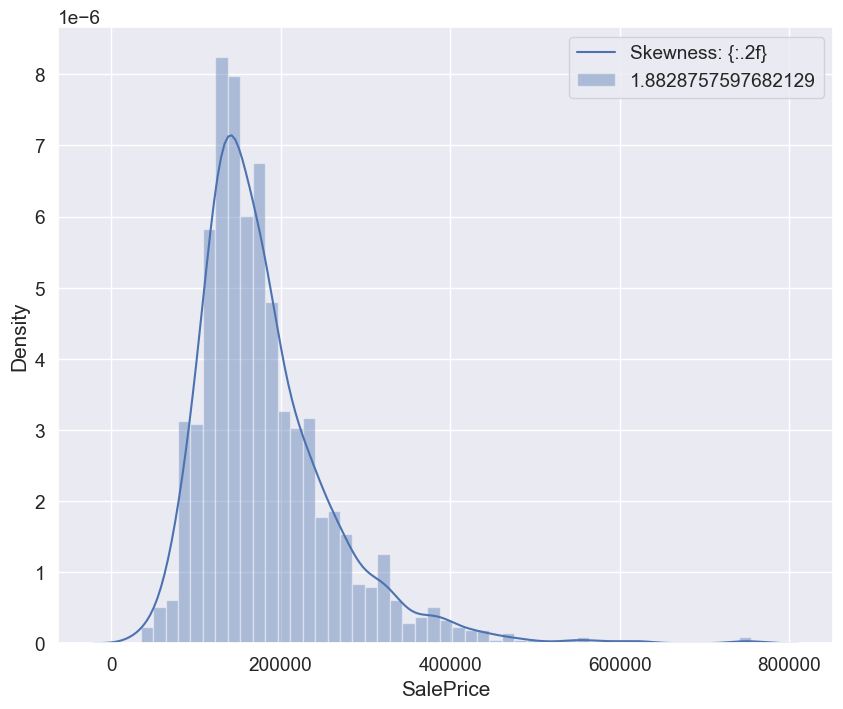

In [191]:
# PLot the distplot of target
plt.figure(figsize=(10, 8))
bar = sns.distplot(df["SalePrice"], kde = True)
bar.legend(["Skewness: {:.2f}", format(df['SalePrice'].skew())])
plt.show()

here sales price normaly distributed with right skewness

### log transformation on sale price - right skewness

this indicates that output variable Sale price is right skewed so i applied log transformation

In [192]:
df['SalePrice'].skew()

1.8828757597682129

In [193]:
df["SalePrice"] = np.log1p(df["SalePrice"]) #Log transformation

Text(0.5, 1.0, 'plot of SalePrice after Log Transformation')

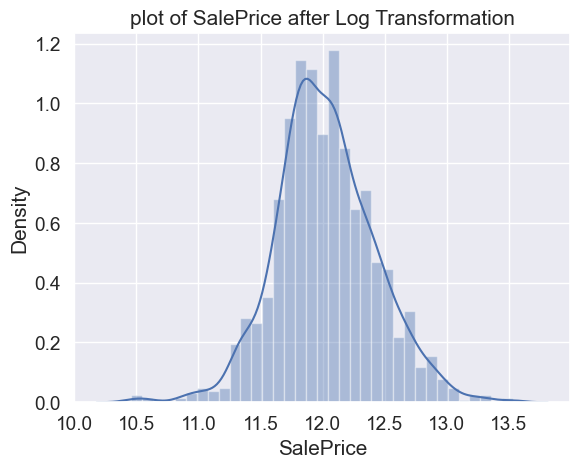

In [194]:
#SalePrice after Log-transformation 
sns.distplot(df["SalePrice"]) 
plt.title("plot of SalePrice after Log Transformation")

In [195]:
#again check skewness:
#Positive Skewness:
df['SalePrice'].skew() #very less of skewness

0.12134661989685333

In [196]:
# Filter numeric columns for correlation computation
numeric_df = df.select_dtypes(include=[np.number])
numeric_cols = numeric_df.columns

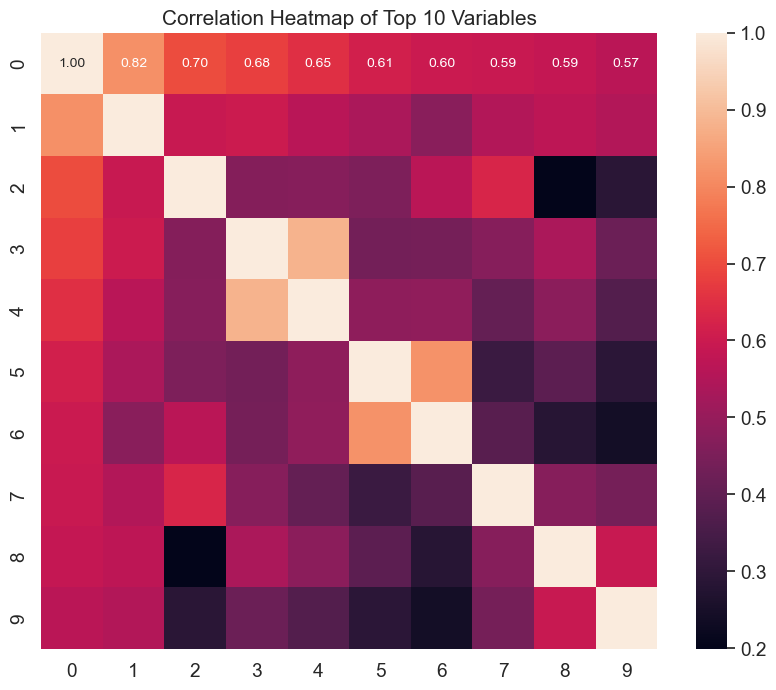

Top variables affecting target variable: Index(['SalePrice', 'OverallQual', 'GrLivArea', 'GarageCars', 'GarageArea',
       'TotalBsmtSF', '1stFlrSF', 'FullBath', 'YearBuilt', 'YearRemodAdd'],
      dtype='object')
Number of variables affecting the target variable: 10


In [197]:
# Calculate correlation matrix
corrmat = numeric_df.corr()

# Select top 10 variables correlated with 'SalePrice'
k = 10
cols = corrmat.nlargest(k, 'SalePrice')['SalePrice'].index

# Calculate correlation coefficients
cm = np.corrcoef(df[cols].values.T)

# Plot heatmap of correlation matrix
plt.figure(figsize=(10, 8))
sns.set(font_scale=1.25)
hm = sns.heatmap(cm, cbar=True, annot=True, square=True, fmt='.2f', annot_kws={'size': 10})
plt.title("Correlation Heatmap of Top 10 Variables")
plt.show()

# Print top variables affecting target variable and their length
print("Top variables affecting target variable:", cols)
print("Number of variables affecting the target variable:", len(cols))

In [198]:
# Select top 10 highly positively correlated features with 'SalePrice'
print(abs(df.select_dtypes(include=np.number).corr()['SalePrice']).nlargest(11)[1:])

OverallQual     0.817185
GrLivArea       0.700927
GarageCars      0.680625
GarageArea      0.650888
TotalBsmtSF     0.612134
1stFlrSF        0.596981
FullBath        0.594771
YearBuilt       0.586570
YearRemodAdd    0.565608
GarageYrBlt     0.541073
Name: SalePrice, dtype: float64


from above heatmap these are highly 10 affecting on sale price :see above result 
1. columns : 'OverallQual', 'GrLivArea', 'GarageCars', 'GarageArea', 'TotalBsmtSF', '1stFlrSF', 'FullBath', 'YearBuilt', 'YearRemodAdd
2. But garage cars and garage area some how same feture affecting so we keep garagearea ,drop garage cars.
3. Also reduce 16/111  some columns with adding some features into one column so we can reducing number of columns.
4. transfoming large value range into log transoformation . check describe() function thier scale.

Transforming the target variable, GrLivArea and OverallQualto log values so that the

In [199]:
print(df['GrLivArea'].skew(),df['TotalBsmtSF'].skew(),df['1stFlrSF'].skew(),
     df['GarageArea'].skew())
#check if the skew is greater than 1

1.3665603560164552 1.5242545490627664 1.3767566220336365 0.17998090674623907


In [200]:
from scipy import stats

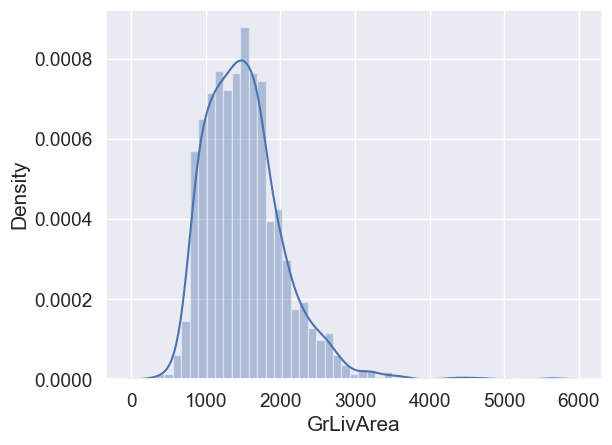

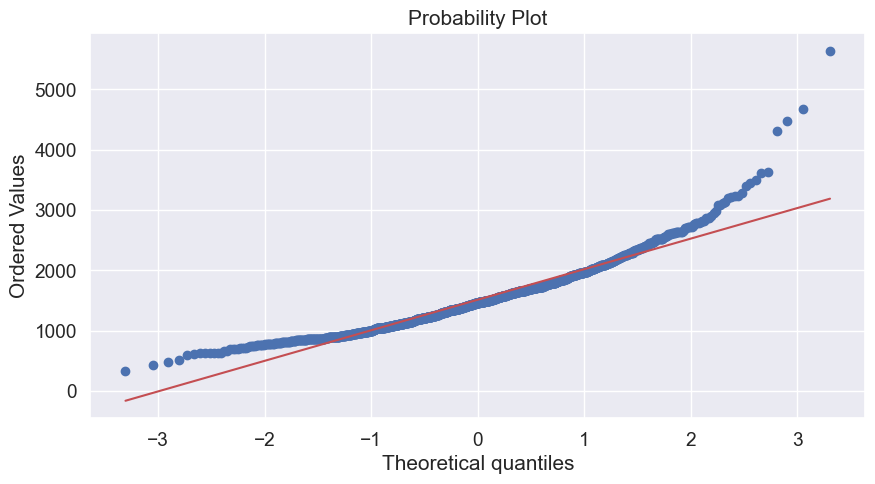

In [201]:
sns.distplot(df['GrLivArea']);
fig_GrLivArea = plt.figure(figsize=(10,5))
result1 = stats.probplot(df['GrLivArea'], plot = plt)
plt.show()

In [202]:
df['GrLivArea'] = np.log1p(df['GrLivArea'])
print("After log transformation GrLivArea Skewness: ", df['GrLivArea'].skew())

After log transformation GrLivArea Skewness:  -0.006140253486287281


#### 3. Datapreprocessing
-  Data preprocessing- is the process of cleaning and preparing the raw data to enable feature engineering.
-  Feature Engineering covers various data engineering techniques such as adding/removing relevant features, handling missing data, encoding the data, handling categorical variables, etc
-  handling missing values
-  handling outliers
-  drop duplicates
-  handling categorical varaibles
-  scaling

In [203]:
#sum of missing data
df.isnull().sum().sort_values(ascending = False)

PoolQC           1453
MiscFeature      1406
Alley            1369
Fence            1179
MasVnrType        872
FireplaceQu       690
LotFrontage       259
GarageYrBlt        81
GarageCond         81
GarageType         81
GarageFinish       81
GarageQual         81
BsmtExposure       38
BsmtFinType2       38
BsmtCond           37
BsmtQual           37
BsmtFinType1       37
MasVnrArea          8
Electrical          1
MSSubClass          0
Fireplaces          0
Functional          0
KitchenQual         0
KitchenAbvGr        0
BedroomAbvGr        0
HalfBath            0
FullBath            0
BsmtHalfBath        0
TotRmsAbvGrd        0
GarageCars          0
GrLivArea           0
GarageArea          0
PavedDrive          0
WoodDeckSF          0
OpenPorchSF         0
EnclosedPorch       0
3SsnPorch           0
ScreenPorch         0
PoolArea            0
MiscVal             0
MoSold              0
YrSold              0
SaleType            0
SaleCondition       0
BsmtFullBath        0
CentralAir

In [204]:
# Get the percentages of null values of each column

null_percent = (df.isnull().sum()/df.shape[0]*100).sort_values(ascending = False)
null_percent

PoolQC           99.520548
MiscFeature      96.301370
Alley            93.767123
Fence            80.753425
MasVnrType       59.726027
FireplaceQu      47.260274
LotFrontage      17.739726
GarageYrBlt       5.547945
GarageCond        5.547945
GarageType        5.547945
GarageFinish      5.547945
GarageQual        5.547945
BsmtExposure      2.602740
BsmtFinType2      2.602740
BsmtCond          2.534247
BsmtQual          2.534247
BsmtFinType1      2.534247
MasVnrArea        0.547945
Electrical        0.068493
MSSubClass        0.000000
Fireplaces        0.000000
Functional        0.000000
KitchenQual       0.000000
KitchenAbvGr      0.000000
BedroomAbvGr      0.000000
HalfBath          0.000000
FullBath          0.000000
BsmtHalfBath      0.000000
TotRmsAbvGrd      0.000000
GarageCars        0.000000
GrLivArea         0.000000
GarageArea        0.000000
PavedDrive        0.000000
WoodDeckSF        0.000000
OpenPorchSF       0.000000
EnclosedPorch     0.000000
3SsnPorch         0.000000
S

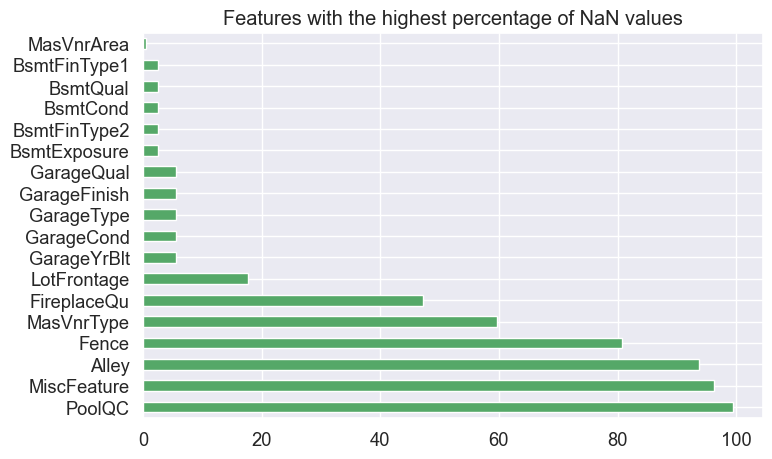

In [205]:
# Show all null values bar graph
plt.figure(figsize=(8,5))

sns.set(font_scale = 1.2)
null_percent[null_percent > 0.1].plot(kind = "barh", color = 'g')
# Horizontal bar
plt.title("Features with the highest percentage of NaN values")
plt.show()

In [206]:
# We have to drop some columns which contains large number of null values and more than 
# Drop these 5 features
drop_variables = ['Alley', 'FireplaceQu', 'PoolQC', 'Fence', 'MiscFeature']
df.drop(drop_variables, axis = 1, inplace = True)

In [207]:
df.shape

(1460, 75)

In [208]:
# some columns are missing values greater than 10%

col_nan =  df.isna().sum() / df.shape[0]
col_nan.sort_values(ascending = False)

MasVnrType       0.597260
LotFrontage      0.177397
GarageCond       0.055479
GarageYrBlt      0.055479
GarageFinish     0.055479
GarageQual       0.055479
GarageType       0.055479
BsmtFinType2     0.026027
BsmtExposure     0.026027
BsmtFinType1     0.025342
BsmtCond         0.025342
BsmtQual         0.025342
MasVnrArea       0.005479
Electrical       0.000685
KitchenQual      0.000000
Functional       0.000000
TotRmsAbvGrd     0.000000
GrLivArea        0.000000
FullBath         0.000000
BsmtFullBath     0.000000
HalfBath         0.000000
KitchenAbvGr     0.000000
BedroomAbvGr     0.000000
BsmtHalfBath     0.000000
MSSubClass       0.000000
Fireplaces       0.000000
ScreenPorch      0.000000
SaleCondition    0.000000
SaleType         0.000000
YrSold           0.000000
MoSold           0.000000
MiscVal          0.000000
PoolArea         0.000000
3SsnPorch        0.000000
2ndFlrSF         0.000000
EnclosedPorch    0.000000
OpenPorchSF      0.000000
WoodDeckSF       0.000000
PavedDrive  

In [209]:
df.columns[df.isnull().any()]# this column have missing values

Index(['LotFrontage', 'MasVnrType', 'MasVnrArea', 'BsmtQual', 'BsmtCond',
       'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2', 'Electrical',
       'GarageType', 'GarageYrBlt', 'GarageFinish', 'GarageQual',
       'GarageCond'],
      dtype='object')

In [210]:
categorical_cols = df.select_dtypes(include=['object']).columns
numerical_cols = df.select_dtypes(include = [np.number]).columns

print("categorical_cols", categorical_cols,len(categorical_cols))
print("numerical_cols: ", numerical_cols, len(numerical_cols))

# afer dropping some columns
#categorical_cols = 38 and numerical_cols, len(numerical_cols)

categorical_cols Index(['MSZoning', 'Street', 'LotShape', 'LandContour', 'Utilities',
       'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2',
       'BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl', 'Exterior1st',
       'Exterior2nd', 'MasVnrType', 'ExterQual', 'ExterCond', 'Foundation',
       'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2',
       'Heating', 'HeatingQC', 'CentralAir', 'Electrical', 'KitchenQual',
       'Functional', 'GarageType', 'GarageFinish', 'GarageQual', 'GarageCond',
       'PavedDrive', 'SaleType', 'SaleCondition'],
      dtype='object') 38
numerical_cols:  Index(['MSSubClass', 'LotFrontage', 'LotArea', 'OverallQual', 'OverallCond',
       'YearBuilt', 'YearRemodAdd', 'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2',
       'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF',
       'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath',
       'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd', 'F

In [211]:

# Find missing values in categorical columns
categorical_cols_with_missing = df[categorical_cols].columns[df[categorical_cols].isnull().any()]

# Find missing values in numerical columns
numerical_cols_with_missing = df[numerical_cols].columns[df[numerical_cols].isnull().any()]

print("categorical_cols_with_missing are: ", len(categorical_cols_with_missing))
print("numerical_cols_with_missing are: ", len(numerical_cols_with_missing))

categorical_cols_with_missing are:  11
numerical_cols_with_missing are:  3


### # Handle missing values in numerical columns with median
for col in numerical_cols_with_missing:
    df[col].fillna(df[col].median(), inplace=True)

# Handle missing values in categorical columns with mode
for col in categorical_cols_with_missing:
    mode_val = stats.mode(df[col]).mode[0]
    df[col].fillna(mode_val, inplace=True)

# Check if there are any remaining missing values
print("Number of missing values after imputation:", df.isnull().sum().sum())Handling Missing Values Median and Mode Using For Loop[:]

In [212]:
# Handle missing values in numerical columns with median
for col in numerical_cols_with_missing:
    df[col].fillna(df[col].median(), inplace=True)

# Handle missing values in categorical columns with mode
for col in categorical_cols_with_missing:
    mode_val = df[col].mode().iloc[0]
    df[col].fillna(mode_val, inplace=True)


# Check if there are any remaining missing values
print("Number of missing values after imputation:", df.isnull().sum().sum())

Number of missing values after imputation: 0


### Convert Columns into same Datatypes:

- Need to be - all datatype features is convert into same datatype, so convert flat into int64


In [213]:
# Need to all datatype into same datatype so convert float into int64
# LotFrontage, MasVnrArea - flaot64 type into int64
# convert sale price int64 - SAle Price

df['LotFrontage'] = df['LotFrontage'].astype(np.int64)
df['MasVnrArea'] = df['MasVnrArea'].astype(np.int64)

df['SalePrice'] = df['SalePrice'].astype(np.int64)
df['GarageYrBlt'] = df['GarageYrBlt'].astype(np.int64)

## Outlier Detection and Removal: Most Imp

#### Removing outliers is important step in data analysis.
#### However while removing outliers in ML we should be carefull, because we do not know if there are not any outliers in test set.
#### checked the outliers then decide to drop outliers or handle the outliers.

## Dectecting outliers check skewness and kurtosis of columns as well,

#### so we will get is it normally distributed or not?

In [214]:
### Normally distributed or not 
from scipy.stats import skew, kurtosis

numerical_cols = df.select_dtypes(include=[np.number]).columns
columns = numerical_cols # Replace with the actual column names

# check normality for each colmns:
for column in columns:
    data = df[column]
    #calculate skewness and kurtosis
    skewness = skew(data)
    kurt = kurtosis(data)

    # Assess normality:
    if abs(skewness) <= 1 and abs(kurt) <= 3: #skewness = 1 and kurtosis = 3
        print(f"Column:{column} is normally distributed")
    else:
        print(f"Column:{column} is not normally distributed")

Column:MSSubClass is not normally distributed
Column:LotFrontage is not normally distributed
Column:LotArea is not normally distributed
Column:OverallQual is normally distributed
Column:OverallCond is normally distributed
Column:YearBuilt is normally distributed
Column:YearRemodAdd is normally distributed
Column:MasVnrArea is not normally distributed
Column:BsmtFinSF1 is not normally distributed
Column:BsmtFinSF2 is not normally distributed
Column:BsmtUnfSF is normally distributed
Column:TotalBsmtSF is not normally distributed
Column:1stFlrSF is not normally distributed
Column:2ndFlrSF is normally distributed
Column:LowQualFinSF is not normally distributed
Column:GrLivArea is normally distributed
Column:BsmtFullBath is normally distributed
Column:BsmtHalfBath is not normally distributed
Column:FullBath is normally distributed
Column:HalfBath is normally distributed
Column:BedroomAbvGr is normally distributed
Column:KitchenAbvGr is not normally distributed
Column:TotRmsAbvGrd is normall

INSIGHTS OF NUMERICAL COLUMNS FROM ABOVE GRAPH: MOST COLUMNS ARE RIGHT SKEWED OR SOME has only constant value columns, some are normaly distributes. MSSubClass is not normally distributed LotFrontage is not normally distributed MasVnrArea is not normally distributed BsmtFinSF1 is not normally distributed BsmtFinSF2 is not normally distributed TotalBsmtSF is not normally distributed 1stFlrSF is not normally distributed LowQualFinSF is not normally distributed BsmtHalfBath is not normally distributed KitchenAbvGr is not normally distributed WoodDeckSF is not normally distributed OpenPorchSF is not normally distributed EnclosedPorch is not normally distributed 3SsnPorch is not normally distributed ScreenPorch is not normally distributed PoolArea is not normally distributed MiscVal is not normally distributed # 17 columns are not normally disriuuted . # but only 9 columns affecting the sale price. we think later .some outlier columns we cant remove because it will be affecting output.

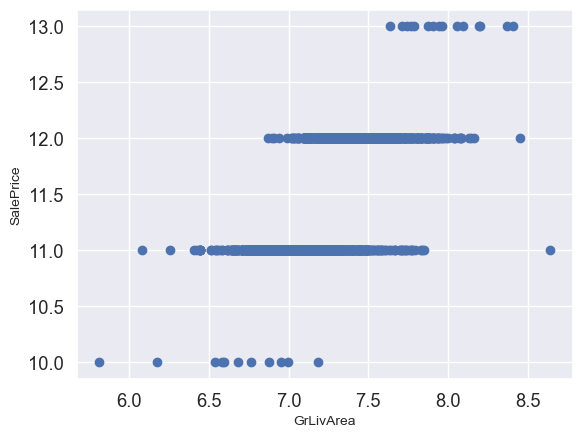

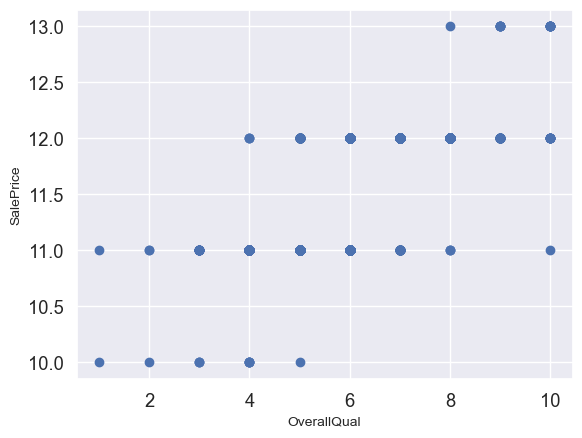

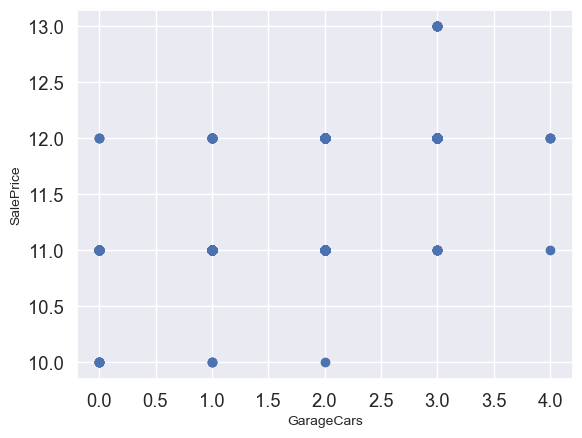

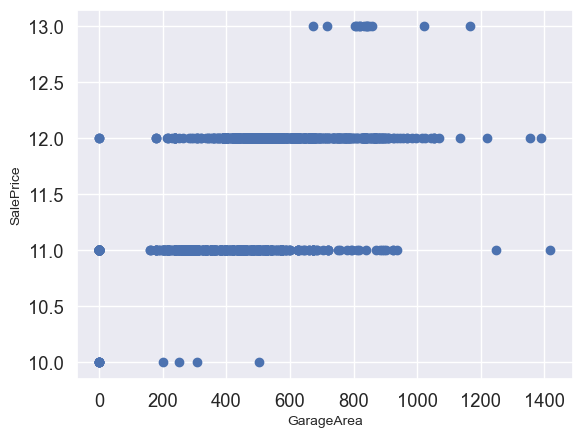

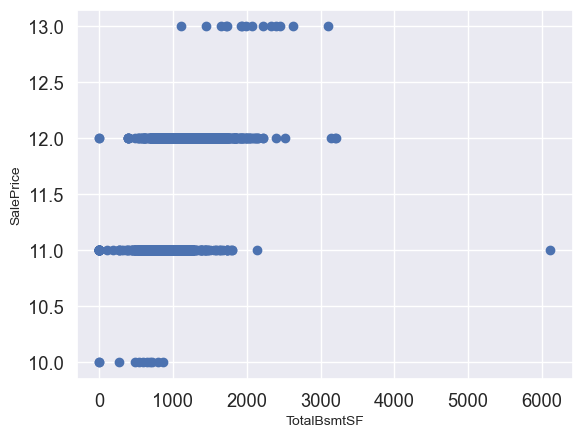

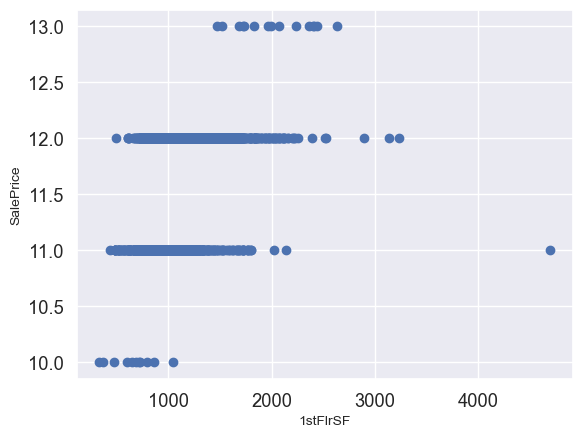

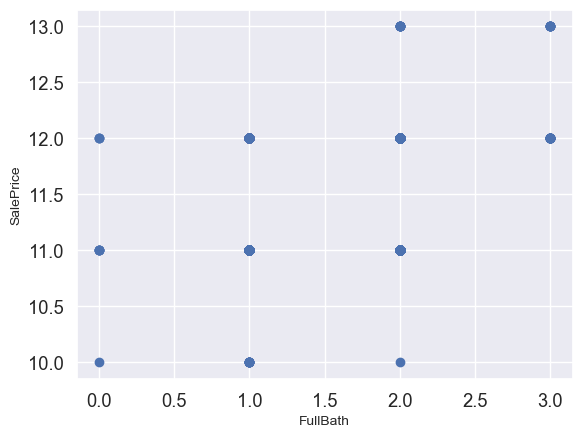

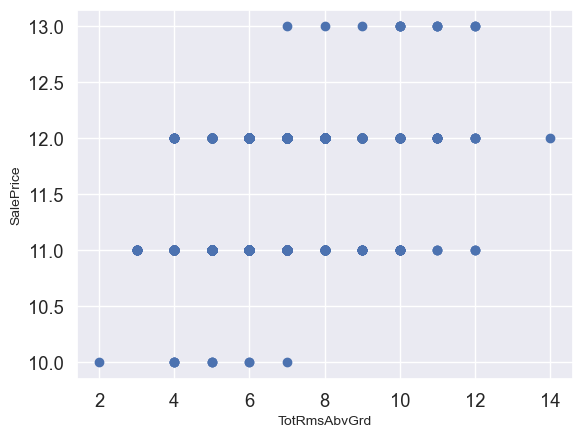

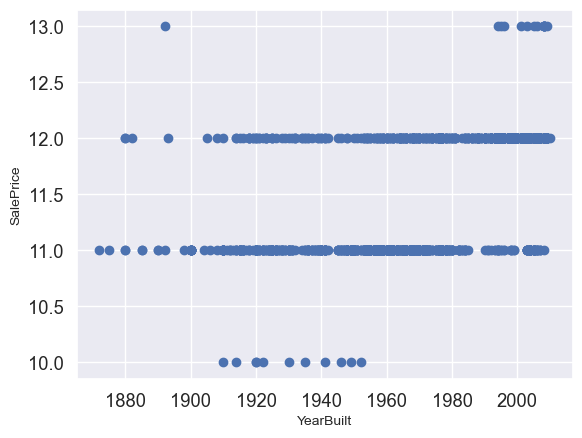

In [215]:
#plot outliers columns using scatter plots
# we are going to detect outliers in whole dataset

fig = plt.subplots()
plt.scatter(x = df['GrLivArea'], y = df['SalePrice'])
plt.ylabel('SalePrice', fontsize = 10)
plt.xlabel('GrLivArea', fontsize = 10)
plt.show()

fig = plt.subplots()
plt.scatter(x = df['OverallQual'], y = df['SalePrice'])
plt.ylabel('SalePrice', fontsize = 10)
plt.xlabel('OverallQual', fontsize = 10)
plt.show()


fig = plt.subplots()
plt.scatter(x = df['GarageCars'], y = df['SalePrice'])
plt.ylabel('SalePrice', fontsize = 10)
plt.xlabel('GarageCars', fontsize = 10)
plt.show()

fig = plt.subplots()
plt.scatter(x = df['GarageArea'], y = df['SalePrice'])
plt.ylabel('SalePrice', fontsize = 10)
plt.xlabel('GarageArea', fontsize = 10)
plt.show()


fig = plt.subplots()
plt.scatter(x = df['TotalBsmtSF'], y = df['SalePrice'])
plt.ylabel('SalePrice', fontsize = 10)
plt.xlabel('TotalBsmtSF', fontsize = 10)
plt.show()

fig = plt.subplots()
plt.scatter(x = df['1stFlrSF'], y = df['SalePrice'])
plt.ylabel('SalePrice', fontsize = 10)
plt.xlabel('1stFlrSF', fontsize = 10)
plt.show()


fig = plt.subplots()
plt.scatter(x = df['FullBath'], y = df['SalePrice'])
plt.ylabel('SalePrice', fontsize = 10)
plt.xlabel('FullBath', fontsize = 10)
plt.show()


fig = plt.subplots()
plt.scatter(x = df['TotRmsAbvGrd'], y = df['SalePrice'])
plt.ylabel('SalePrice', fontsize = 10)
plt.xlabel('TotRmsAbvGrd', fontsize = 10)
plt.show()

fig = plt.subplots()
plt.scatter(x = df['YearBuilt'], y = df['SalePrice'])
plt.ylabel('SalePrice', fontsize = 10)
plt.xlabel('YearBuilt', fontsize = 10)
plt.show()
 

In [216]:
df[['1stFlrSF','SalePrice']].describe()

,1stFlrSF,SalePrice
count,1460.000000,1460.000000
mean,1162.626712,11.505479
std,386.587738,0.534586
min,334.000000,10.000000
25%,882.000000,11.000000
50%,1087.000000,12.000000
75%,1391.250000,12.000000
max,4692.000000,13.000000


In [217]:
# above all highly related correlated feature with output so I check their outliers.
# we drop some outliers from specific range

df = df.drop(df[(df['GrLivArea']>8.6) & (df['SalePrice']<13.5)].index) 
df = df.drop(df[(df['GarageArea']>1300) & (df['SalePrice']<13.5)].index) 
df = df.drop(df[(df['TotalBsmtSF']>3000) & (df['SalePrice']<13.5)].index) 
df = df.drop(df[(df['1stFlrSF']>3000) & (df['1stFlrSF']<13.5)].index)
# you will get an idea of which points are outliers, and below is used to delete

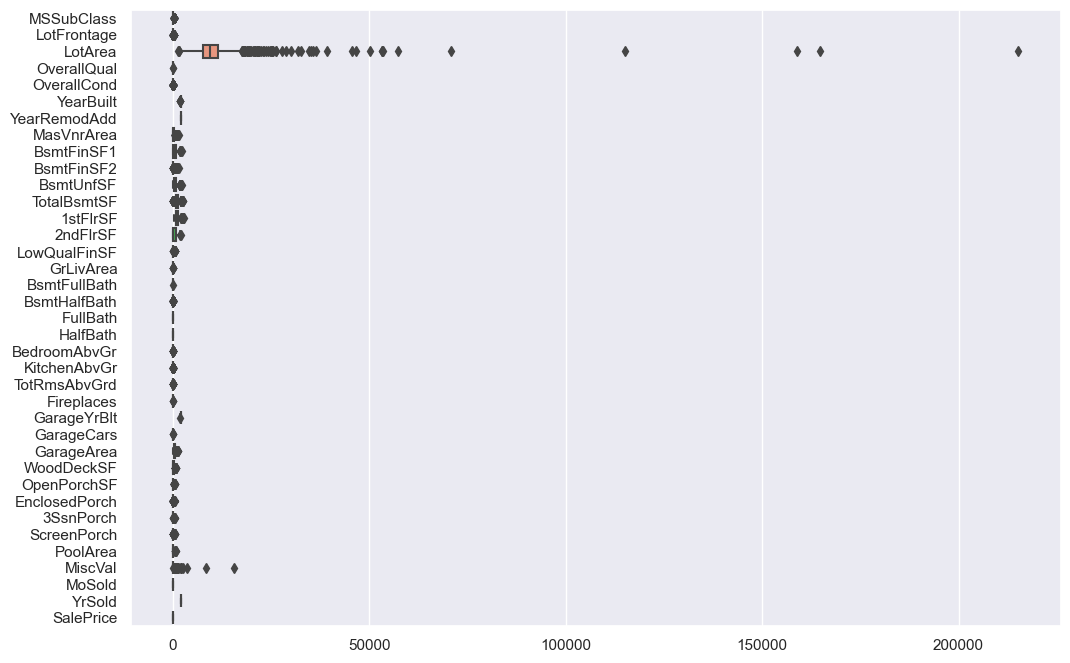

In [218]:
#check outlier
plt.figure(figsize=(12, 8))
sns.set_theme(style="darkgrid")
sns.set_palette("GnBu")
ax = sns.boxplot(data=df, orient="h")
plt.show()

In [219]:
df.LotFrontage.describe()

count    1453.000000
mean       69.602202
std        21.041185
min        21.000000
25%        60.000000
50%        69.000000
75%        79.000000
max       313.000000
Name: LotFrontage, dtype: float64

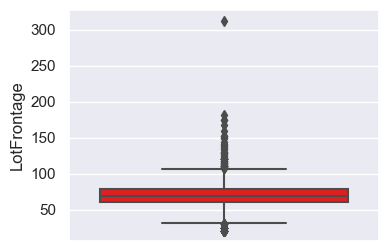

In [220]:
# boxplot of numeric column only
plt.figure(figsize=(4, 3))

sns.boxplot(y = df['LotFrontage'],orient="h", color="red")

plt.show()

In [221]:
# Check skewnes then handle the outliers
print("skewness value of : ", df['LotFrontage'].skew())
print("skewness value of: ", df['LotArea'].skew())

skewness value of :  1.729525073719968
skewness value of:  12.620650803812744


decided to replace LotFrontage house - impute value with median only

In [222]:
#using detection percentile choose 10% and 90%
print(df['LotFrontage'].quantile(0.10))
print(df['LotFrontage'].quantile(0.90))

'''capping(e.g. the 90th percentile) for thehigher values'''

49.0
92.0


'capping(e.g. the 90th percentile) for thehigher values'

In [223]:
print(df['LotArea'].quantile(0.10))
print(df['LotArea'].quantile(0.90))

5000.0
14294.399999999998


In [224]:
# removing outliers using where df["LotFrantage"]
df["LotFrontage"] = np.where(df["LotFrontage"]<49.0, 49.0,df['LotFrontage'])
df["LotFrontage"] = np.where(df["LotFrontage"]>91.0, 91.0,df['LotFrontage'])
print(df['LotFrontage'].skew())#normal distribution

0.1229750086400216


In [225]:
#remove outliers using where 
df["LotArea"] = np.where(df["LotArea"] <5000.0, 5000.0,df['LotArea'])
df["LotArea"] = np.where(df["LotArea"] >14226.400000000001, 14226.400000000001,df['LotArea']) 
print(df['LotArea'].skew())
# it removes some outliers 

0.06904789634513771


3. EDA - DATA VISUALIZATION
- I.UNIVARIATE ANALYSIS -Categorical variables can be visualized using a Count plot, Bar Chart, Pie Plot, etc. Numerical Variables can be visualized using Histogram, Box Plot, Density Plot,
- II. BIVARIATE ANALYSIS: Bivariate Analysis helps to understand how variables are related to each other and the relationship between dependent and independent variables present in the dataset.-For Numerical variables, Pair plots and Scatter plots are widely been used to do Bivariate Analysis.
- A Stacked bar chart can be used for categorical variables if the output variable is a classifier. Bar plots can be used if the output variable is continuous
- III. Multivariate Analysis -A heat map is widely been used for Multivariate Analysis
  -Heat Map gives the correlation between the variables, whether it has a positive or negative correlation.
- Univariate analysis can be done for both Categorical and Numerical variables.

In [226]:
## identifying numeric variables 
numeric = df.select_dtypes(include=['float64','int64']) 
numeric = numeric.columns

In [227]:
print(numeric, len(numeric))
'''please go and check histogram plots of numerical columns only. '''

Index(['MSSubClass', 'LotFrontage', 'LotArea', 'OverallQual', 'OverallCond',
       'YearBuilt', 'YearRemodAdd', 'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2',
       'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF',
       'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath',
       'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd', 'Fireplaces',
       'GarageYrBlt', 'GarageCars', 'GarageArea', 'WoodDeckSF', 'OpenPorchSF',
       'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea', 'MiscVal',
       'MoSold', 'YrSold', 'SalePrice'],
      dtype='object') 37


'please go and check histogram plots of numerical columns only. '

- DISTRIBUTIUTION OF NUMERICAL FEATURES : Numerical columns plot:

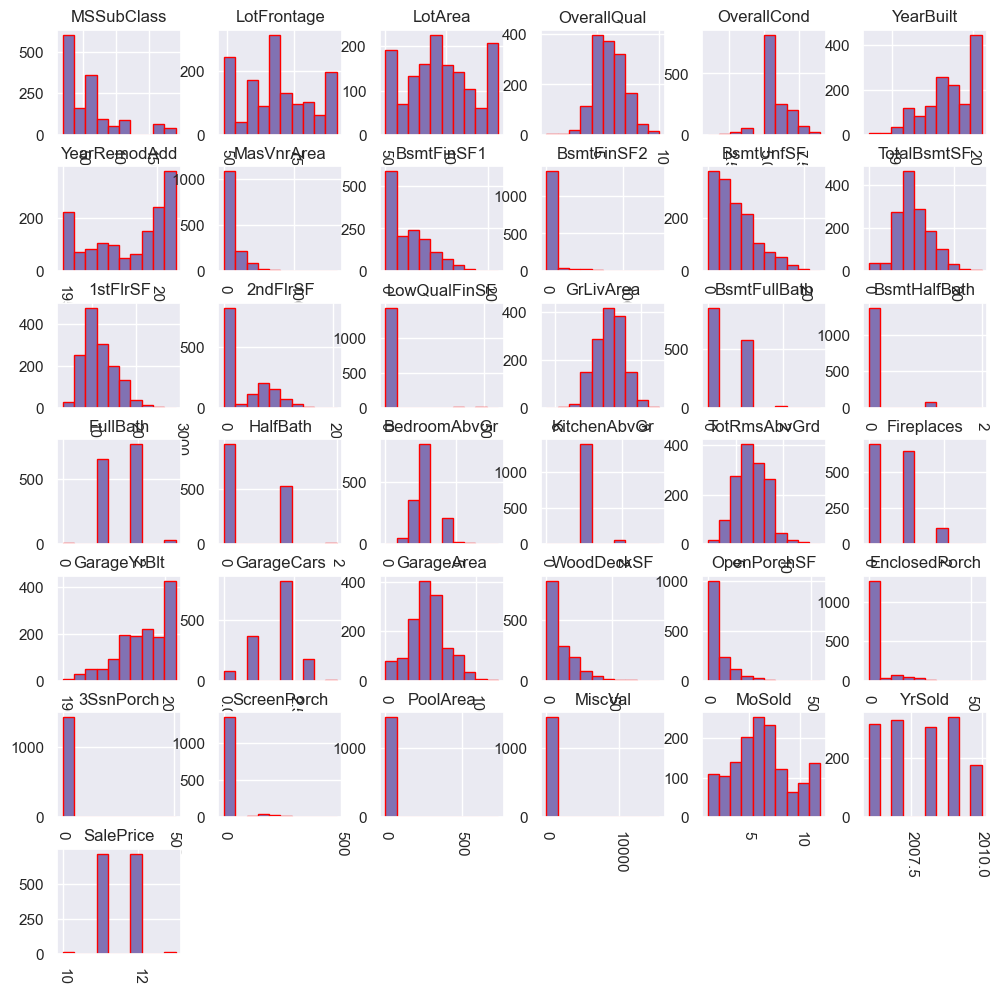

In [228]:
# DISTRIBUTIUTION OF NUMERICAL FEATURES : Numerical columns plot:

df.hist(figsize=(12,12), xrot=-90, bins=10, color = "m",ec="red")
plt.show()

Plot categorical columns :using countplot(),piechart()

In [229]:
# plot categorical columns ##identifying categorical variables 
categorical = df.select_dtypes(include=['object']) 
categorical = categorical.columns

In [230]:
print("categorical columns :", categorical,"length is ",len(categorical))

categorical columns : Index(['MSZoning', 'Street', 'LotShape', 'LandContour', 'Utilities',
       'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2',
       'BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl', 'Exterior1st',
       'Exterior2nd', 'MasVnrType', 'ExterQual', 'ExterCond', 'Foundation',
       'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2',
       'Heating', 'HeatingQC', 'CentralAir', 'Electrical', 'KitchenQual',
       'Functional', 'GarageType', 'GarageFinish', 'GarageQual', 'GarageCond',
       'PavedDrive', 'SaleType', 'SaleCondition'],
      dtype='object') length is  38


- 1.pie chart : for categorical columns:

<Axes: ylabel='count'>

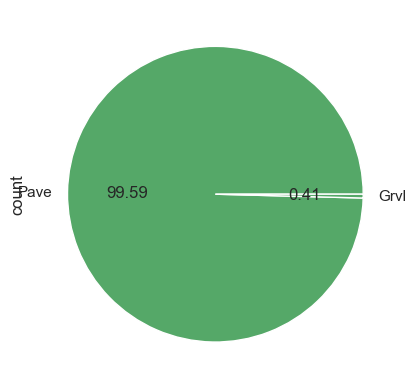

In [231]:
# pie chart for categorical variable .ieStreet 
#colors = ['#ff9999','#66b3ff','#99ff99','#ffcc99'] 
df["Street"].value_counts().plot(kind='pie',autopct='%.2f',colors='g') 

- street column show only one pave constant value so we drop in future.

<Axes: ylabel='count'>

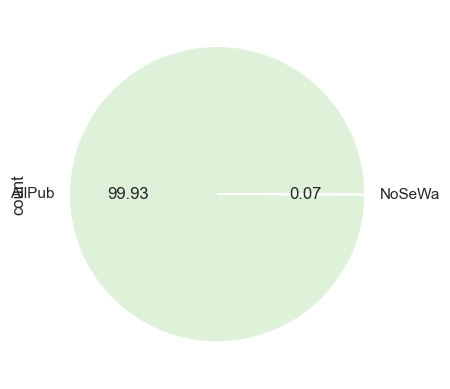

In [232]:
df["Utilities"].value_counts().plot(kind='pie',autopct='%.2f') 

- same as street column show only Utilities - one ALL PUB - constant value so we can drop in future.

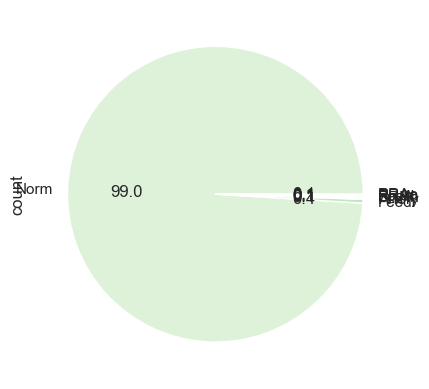

In [233]:
# Condition1 
df["Condition2"].value_counts().plot(kind='pie',autopct='%.1f')
plt.show() # same as above two columns we can drop in future - Condition2

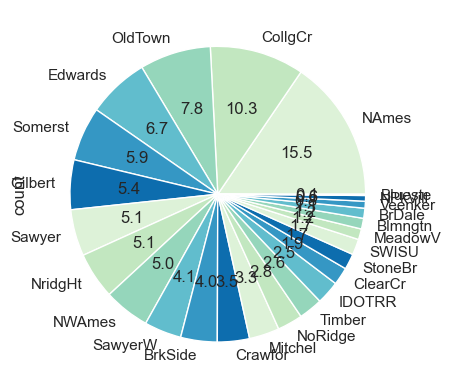

In [234]:
# Neighborhood 
df["Neighborhood"].value_counts().plot(kind='pie',autopct='%.1f') 
plt.show()

#### Neighborhood column - NORTH AMERICAN side more houses ,means crowded area, then Collgcr then Oldtown then so on .it is important column .According to diiferent regions have different sale price.

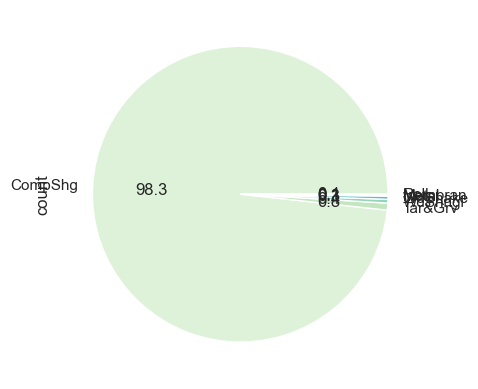

In [235]:
# RoofMatl
df["RoofMatl"].value_counts().plot(kind='pie',autopct='%.1f') 
plt.show()

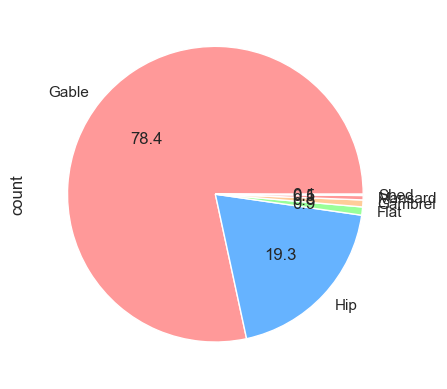

In [236]:
# RoofStyle: Gabel type roofstyling most houses are there. 
colors = ['#ff9999','#66b3ff','#99ff99','#ffcc99'] 
df["RoofStyle"].value_counts().plot(kind='pie',autopct='%.1f',colors=colors)
plt.show()

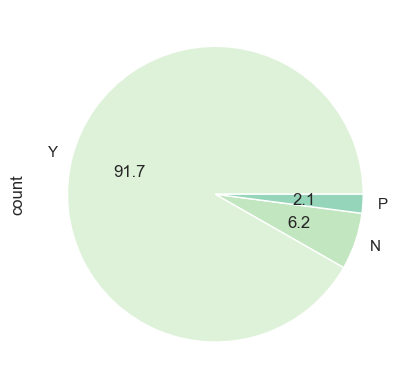

In [237]:
#PavedDrive 
df["PavedDrive"].value_counts().plot(kind='pie',autopct='%.1f') 
plt.show()

- PavedDrive -insight is most houses are pavedrive area 91.7% it important feature when buy house.

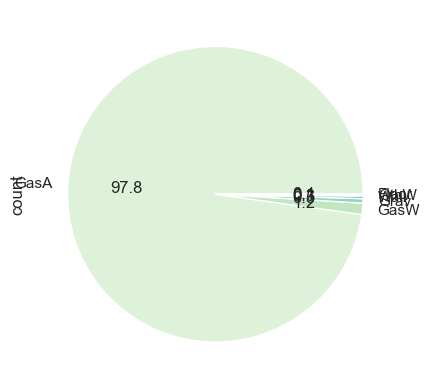

In [238]:
df["Heating"].value_counts().plot(kind='pie',autopct='%.1f')
plt.show()

- Heating - In all houses heating system are provided almost 97.8 %

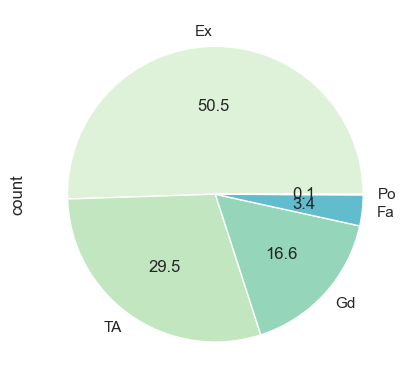

In [239]:
df["HeatingQC"].value_counts().plot(kind='pie',autopct='%.1f') 
plt.show()

- Heating QC and heating both variables showing heating service, so we can drop heating column because already heating quality is provided by our dataset so in future we drop heating column.

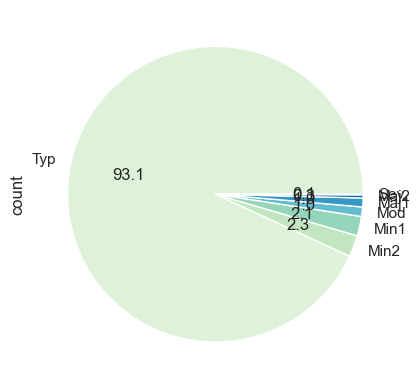

In [240]:
# Functional -

df["Functional"].value_counts().plot(kind="pie", autopct = '%.1f')
plt.show()

- Functional- Home Functionality rating is type means typical upto 93.1% so have to take this column and drop i=other related columns such as Electical

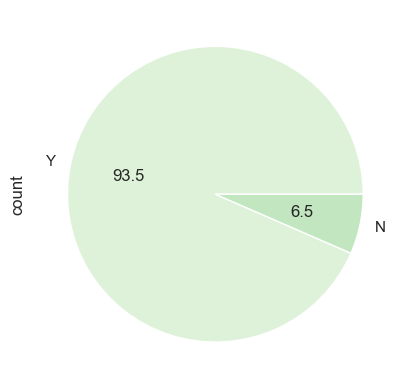

In [241]:
#'CentralAir', 'Electrical', 'KitchenQual',

df["CentralAir"].value_counts().plot(kind = 'pie', autopct = '%.1f')
plt.show()

<Axes: ylabel='count'>

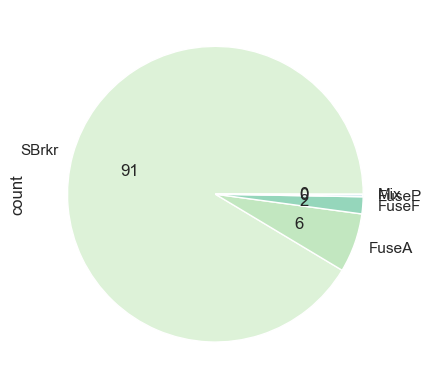

In [242]:
df["Electrical"].value_counts().plot(kind = 'pie', autopct = '%1.f')

- CentralAir - almost all houses haveCentralAir system -93.4 % - df['Electrical']
almost all houses provided SBrkr electrical system 91.4%

<Axes: ylabel='count'>

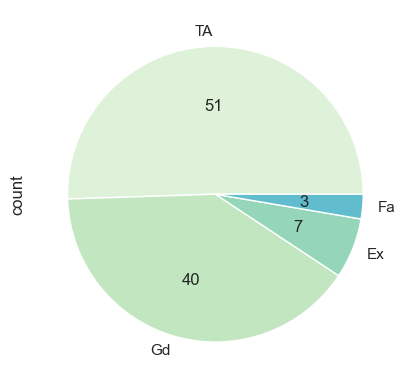

In [243]:
# KitchenQual -
df["KitchenQual"].value_counts().plot(kind = "pie", autopct = '%1.f')

- Kitchen Quality is another important feature to predict house price. There is a big difference in price between houses with different kitchen quality

### Plot bar/countplot - categorical columns-

In [244]:
#using for loop you can plot countplot: of all categorical columns:

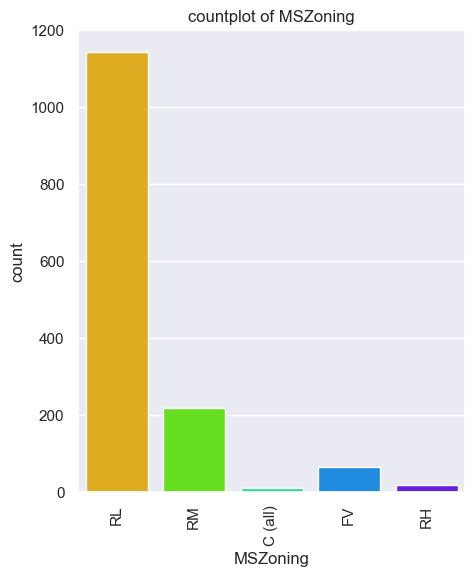

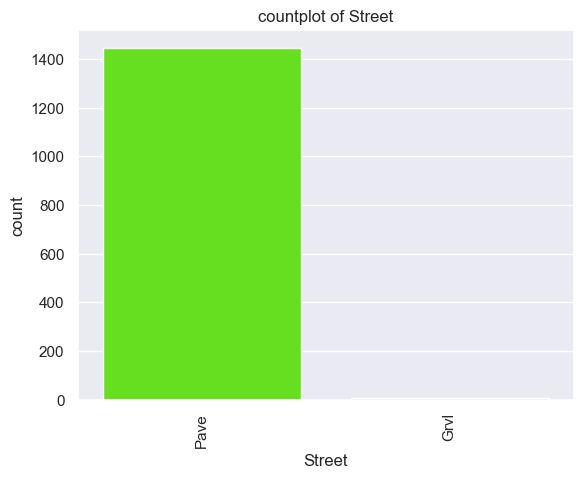

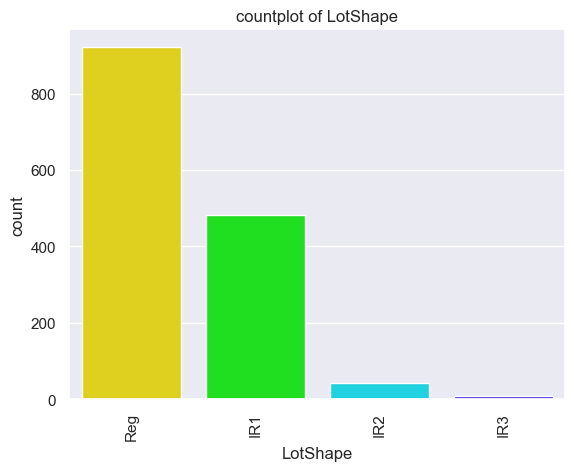

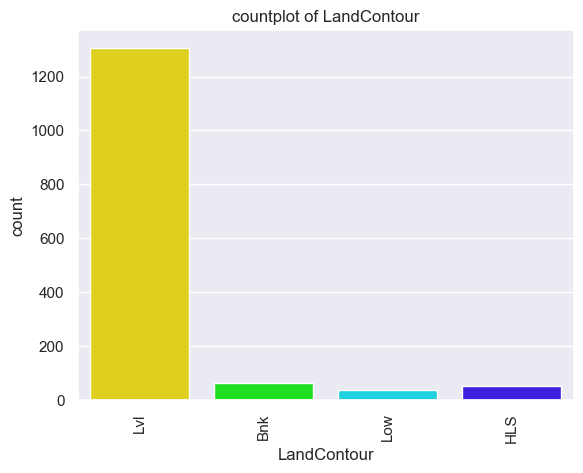

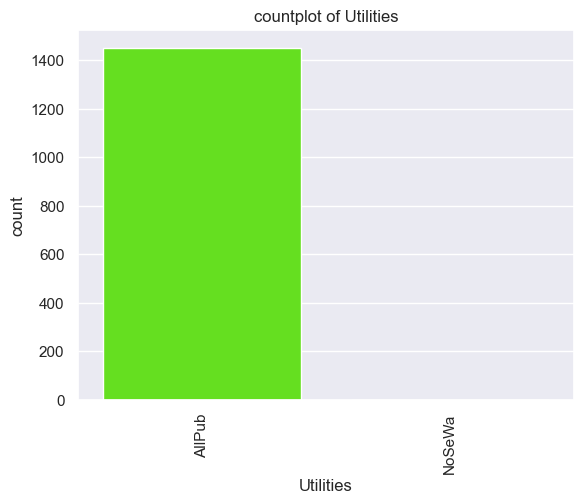

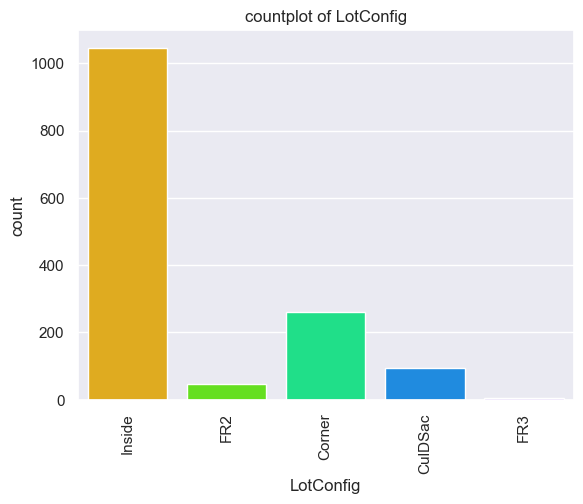

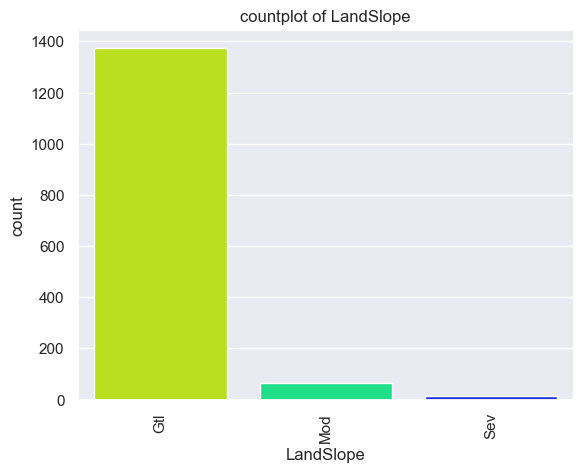

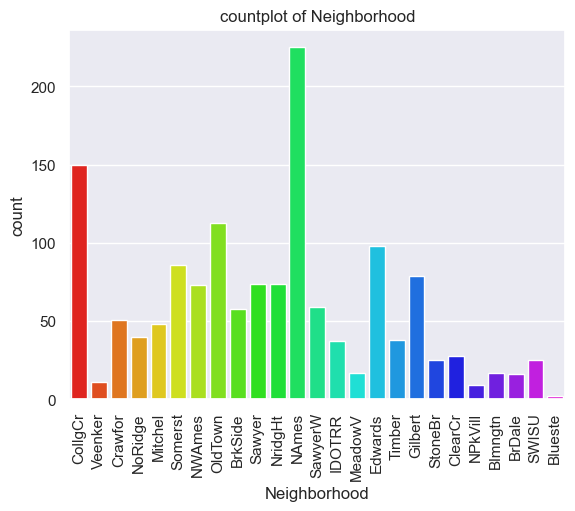

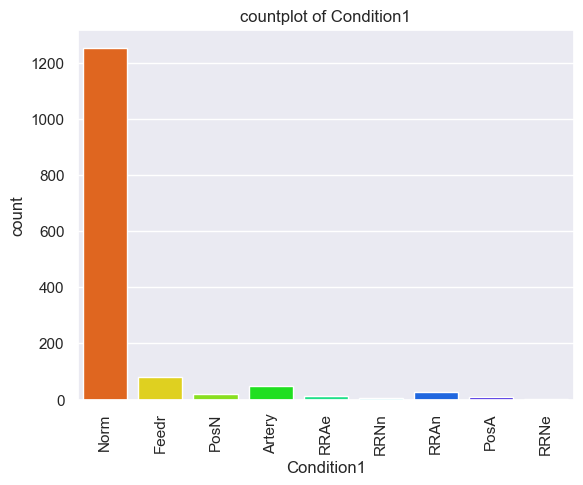

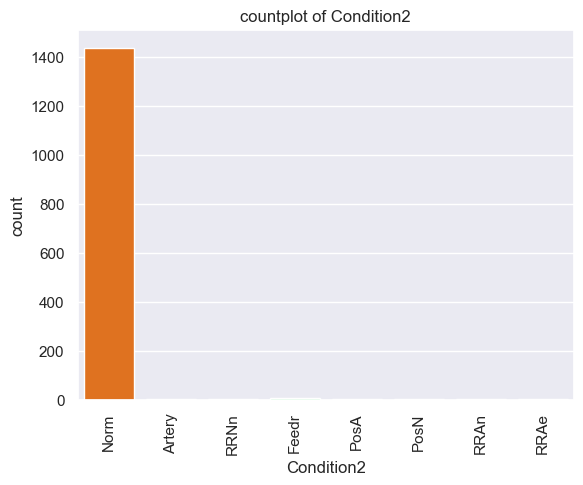

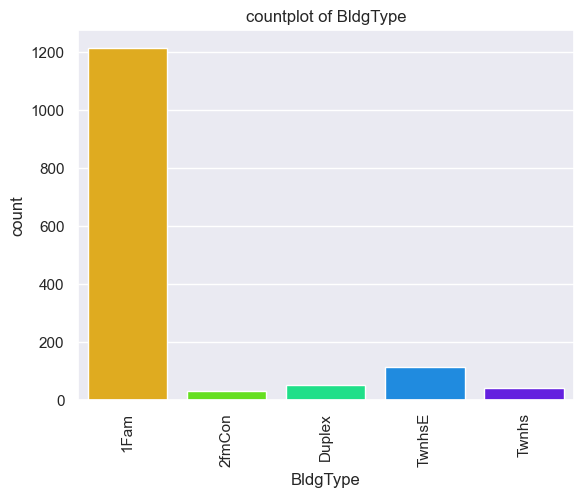

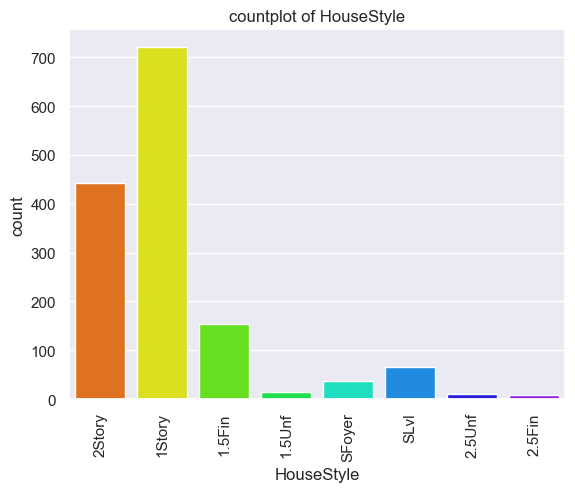

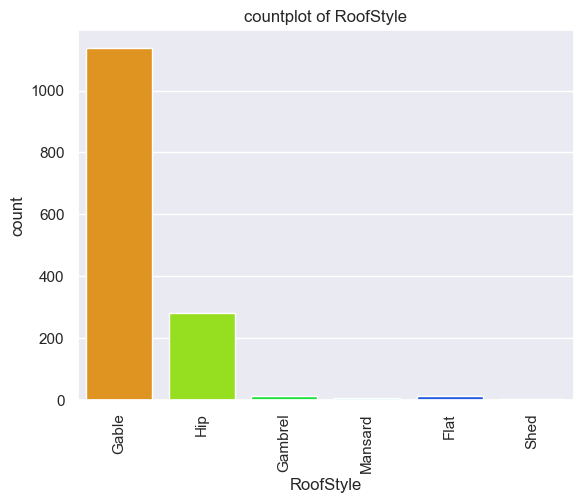

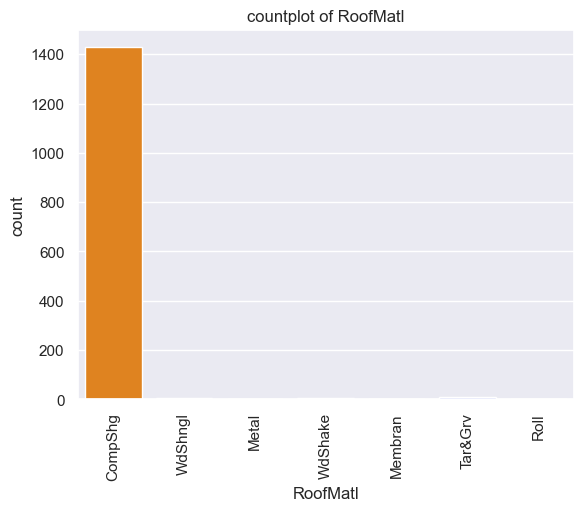

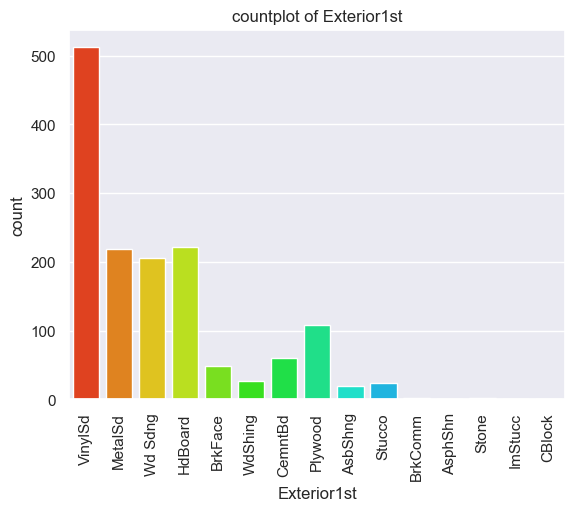

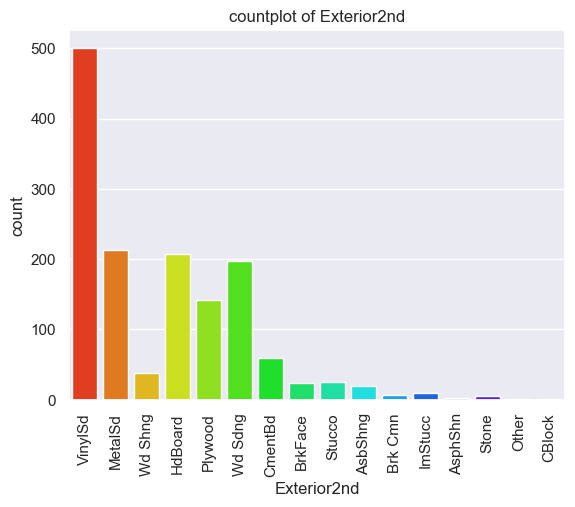

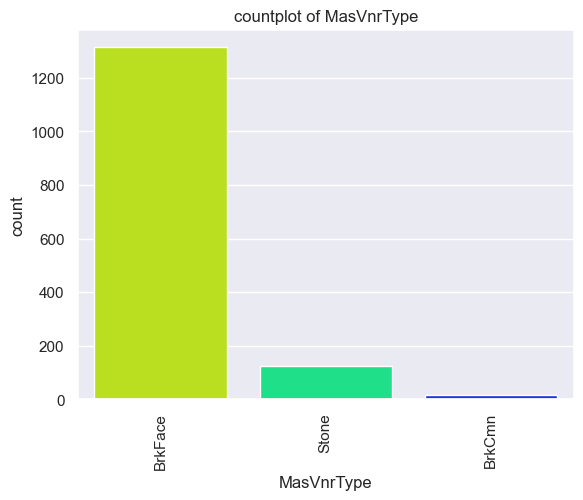

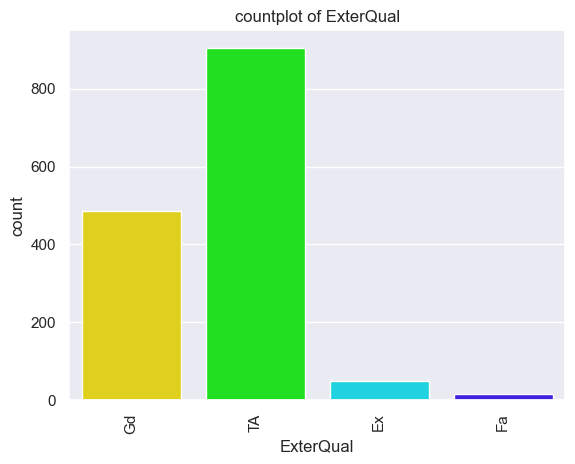

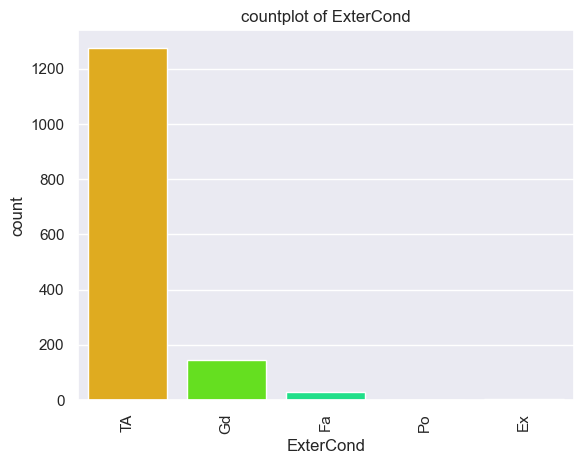

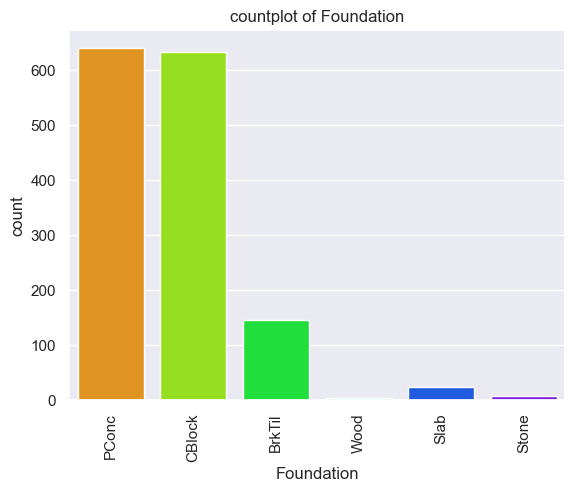

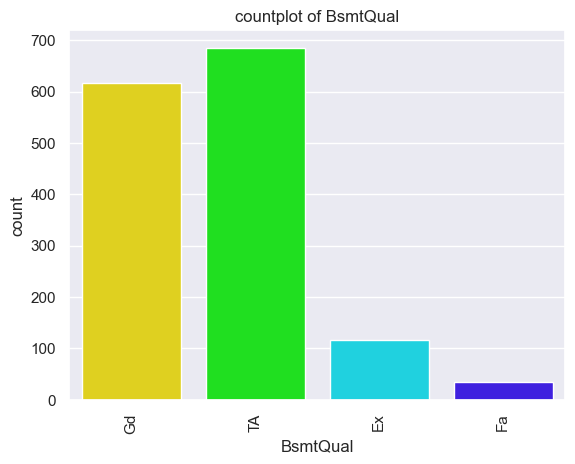

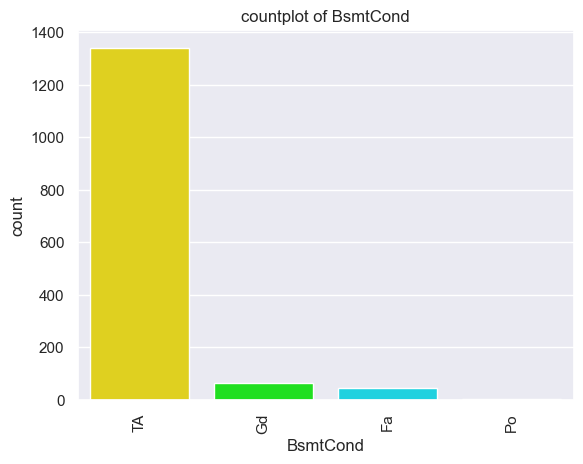

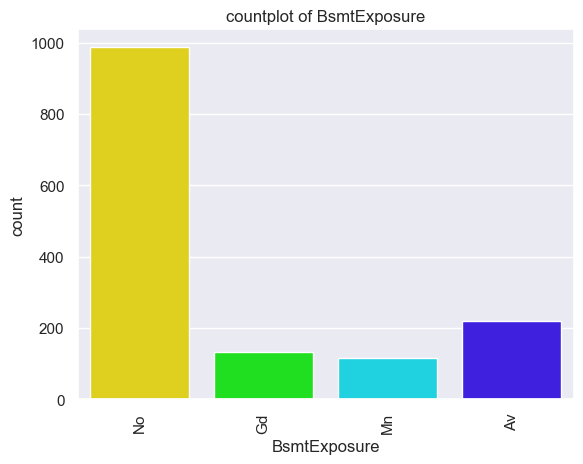

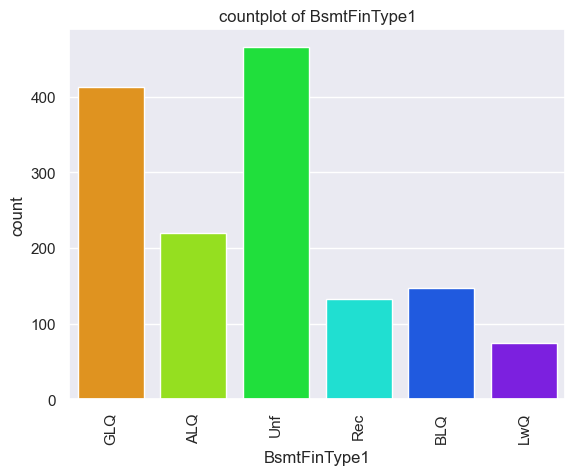

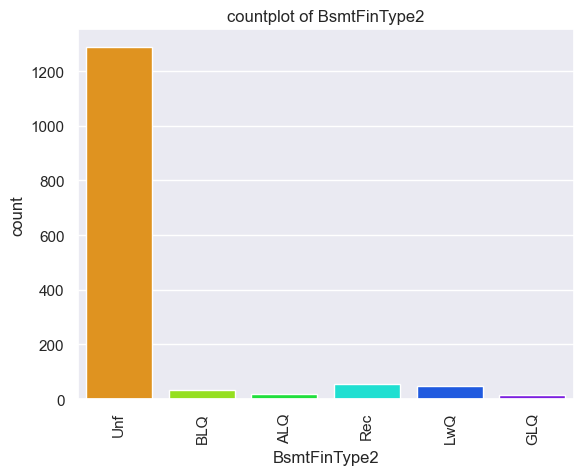

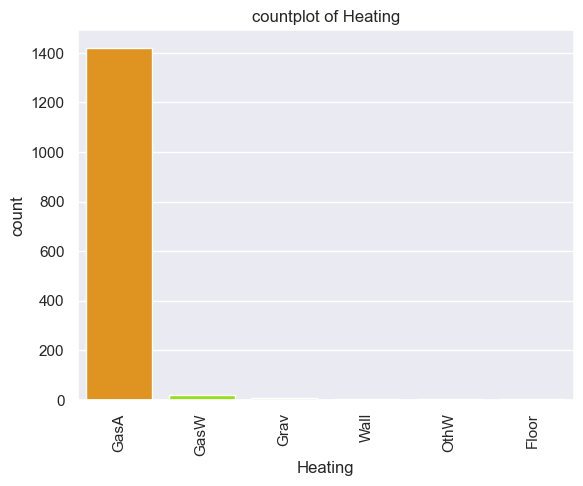

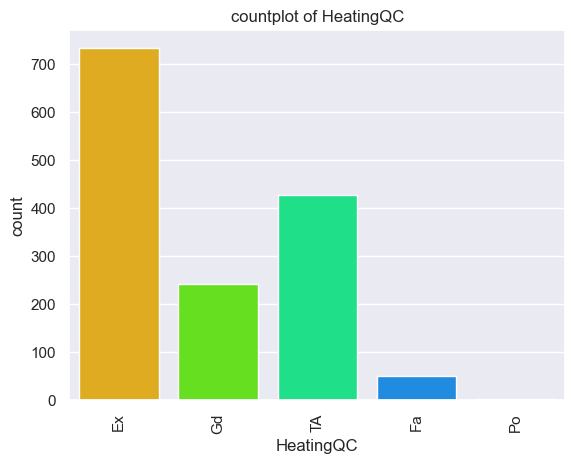

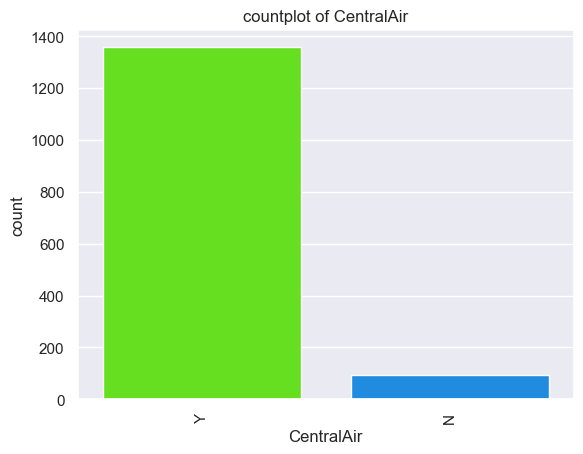

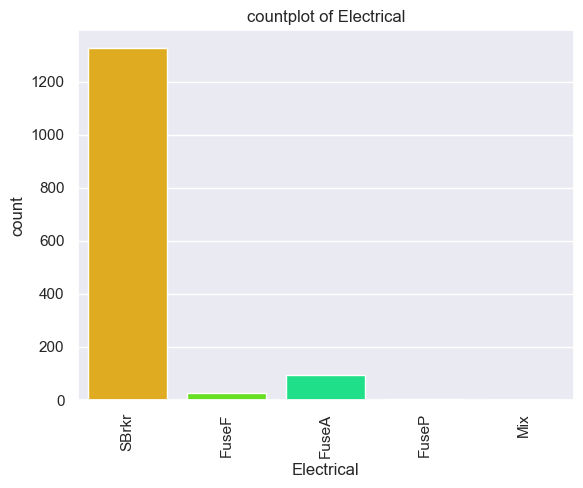

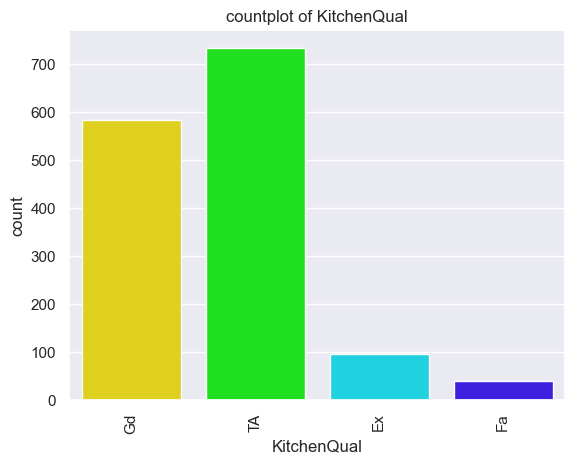

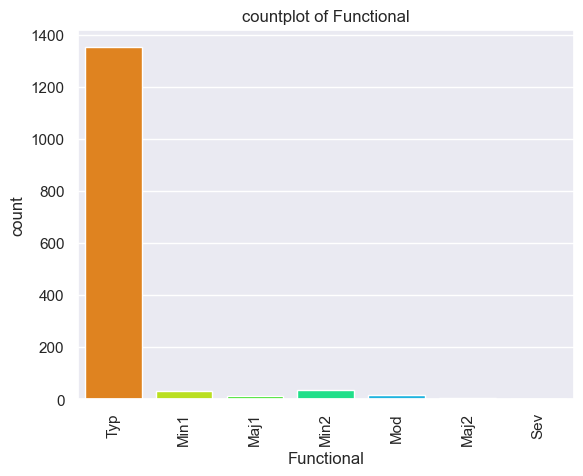

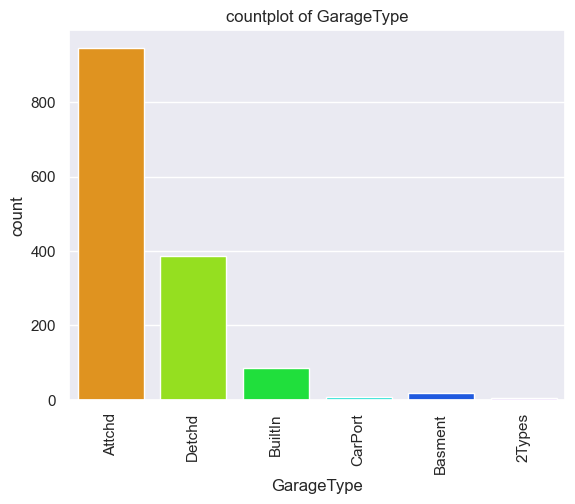

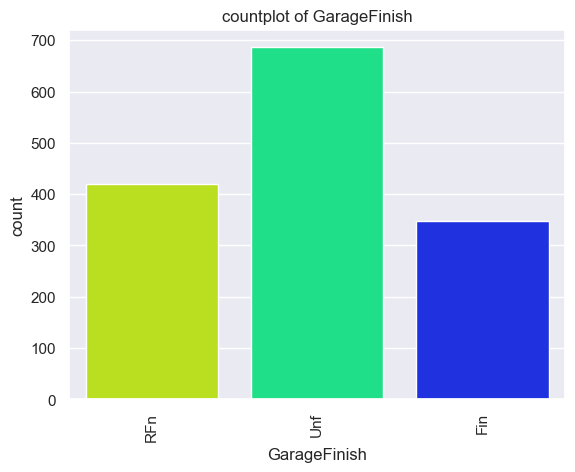

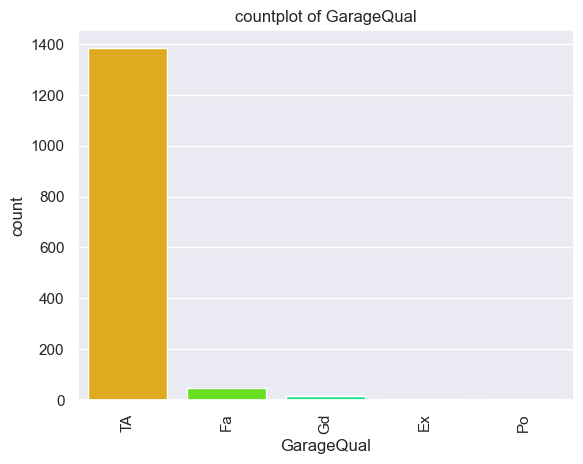

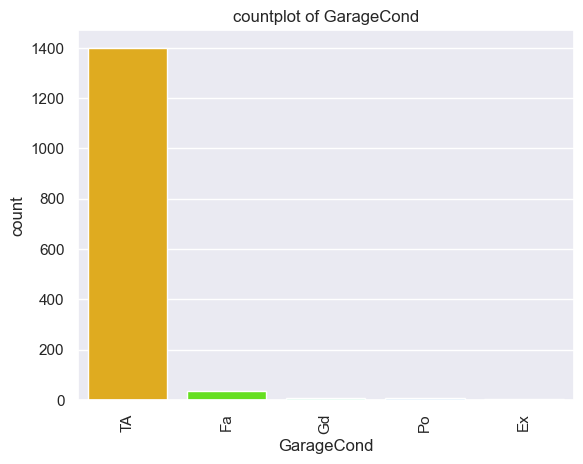

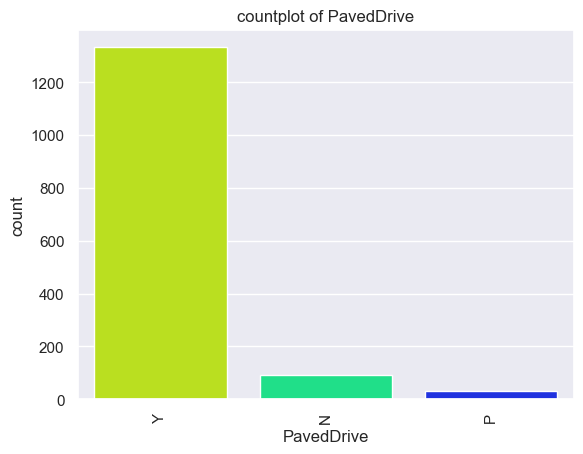

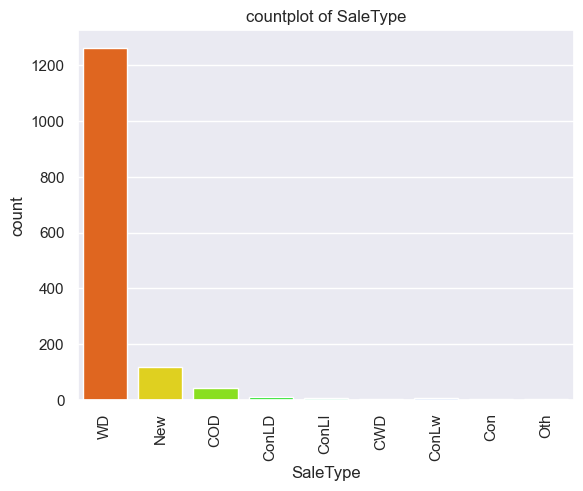

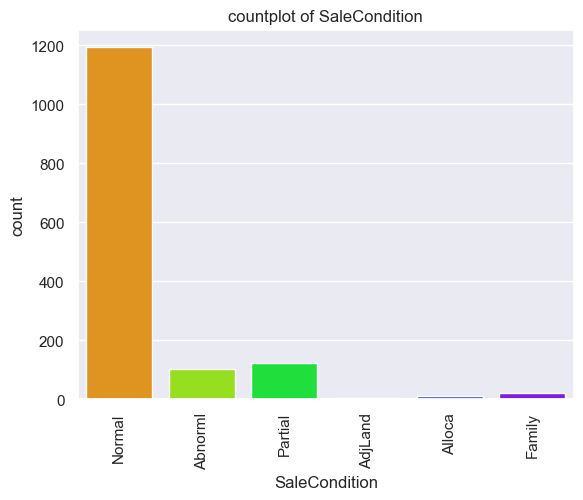

In [245]:
fig = plt.figure(figsize=(5, 6))

for col in categorical:
    sns.countplot(x = col, data = df, palette = "gist_rainbow")
    plt.xticks(rotation = 90)
    plt.title(f"countplot of {col}")

    plt.show()
fig.tight_layout(pad = 0.2)

- INSIGHTS FROM ABOV GRAPHS OF CATEGORICAL COLUMNS : 1. MSzoning - most RL category is most population- Residential Low Density 2. Street - most street pave have more peoples are lived. /more sales 3. LotShape- General shape of property is most count of REG,IR1- REGULAR 4.LandContour: Flatness of the property- MOST COUNTS Near Flat/Level. 5. RoofStyle: Type of roof- most type are Gable then hip less 6. LotConfig: Lot configuration - most inside lot counts 7.landslope- GTL (gentel)TYPE slope is most there 8.Neighborhood: Physical locations within this city limits - all neighborhood most cities are there # # INSIGHTS FROM ABOV GRAPHS OF CATEGORICAL COLUMNS :basement features. 9.BsmtQual: Evaluates the height of the basement- most houses of Gd Good (90-99 inches) TA Typical (80-89 inches) 10.BsmtExposure: Refers to walkout or garden level walls-: No-No Exposure most found in most houses 11.BsmtFinType1: Rating of basement finished area: GLQ- Good Living Quarters, Below Average Living Quarters : most found oridnal categories. 12. BsmtFinType2: Rating of basement finished area (if multiple types)-: mostly Unf-Unfinshed basement is there so we can drop this column because it is not important for model and sale price. - HeatingQC Ex 731 most property excellent shown - ordinal category - CentralAir Y 1353- most houses have Central air conditioning - GarageCars: Size of garage in car capacity not affecting saleprice: so drop - GarageArea: Size of garage in square feet - i keep # GarageQual, GarageCond same values so we can drop any one # i will drop same columns charactersitcs BldgType: Type of dwelling, HouseStyle: Style of dwelling drop any 1 . # GARAGE TYPE- MOSTLY AVAREGE TYPE TA:GarageQual-TA 1380 : DROP # BldgType - MOST TYPE 1Fam 120: BldgType: Type of dwelling and HouseStyle: Style of dwelling : same type of meaning so i drop : BldgType : shows same characteristics not affect price .it not showing too much building type # df.GarageCond.describe().T :top TAfreQ 1407,
#### BIVARIATE Analysis:
- Need to find out more about the relationship between all these features with one another.
- Alreay plot scatterplot of highly correlated 10 features with saleprice.
- Also plot heatmap .

--Heatmap : checking correlation between columns

<Axes: >

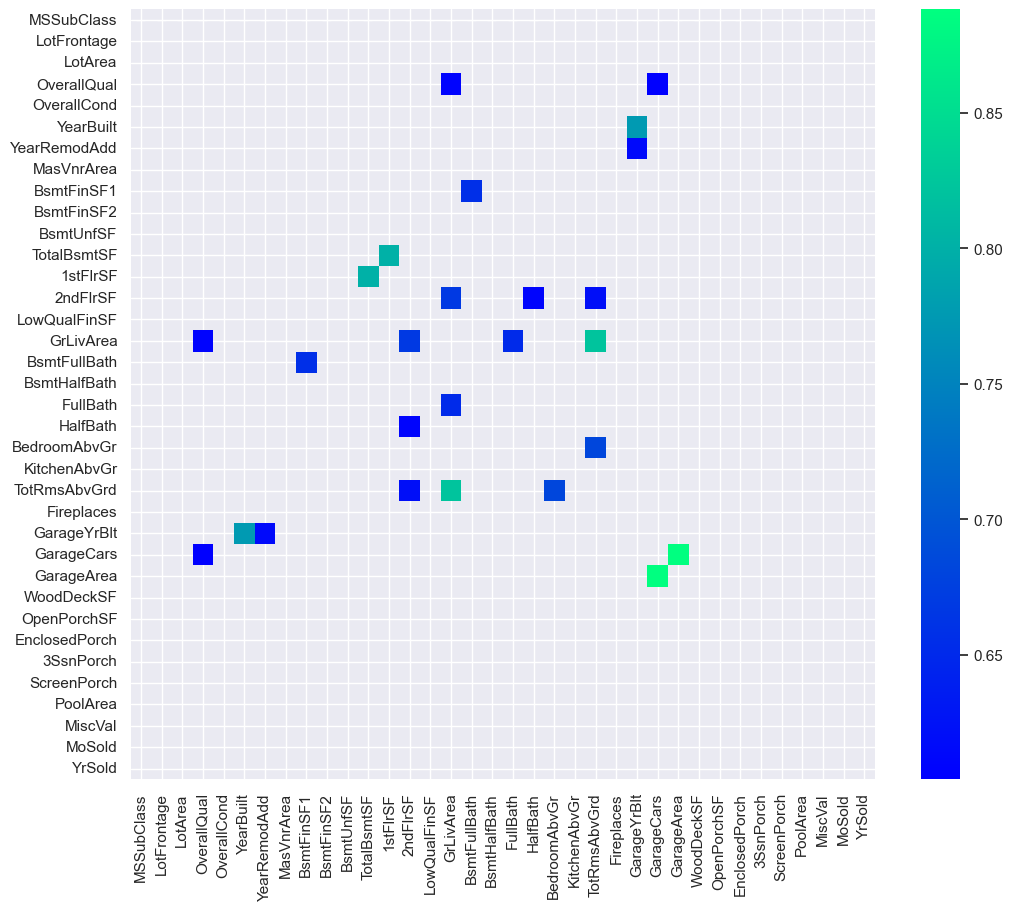

In [246]:
# Select only numeric columns for correlation calculation
numeric_df = df.select_dtypes(include=['int64', 'float64'])

# Create correlation matrix from numeric columns excluding SalePrice
corr_mat = numeric_df.drop(columns=['SalePrice']).corr()

# Select correlations greater than 0.6
high_corr_mat = corr_mat[(corr_mat >= 0.6) & (corr_mat < 1)]

# Plot correlation heatmap
plt.figure(figsize=(12, 10))
sns.heatmap(high_corr_mat, annot=True, fmt='.1f', cmap='winter', vmin=None, vmax=None)



There is multicollinearity in our df dataset. Below features are highly correlated: - # GarageCars and GarageArea # GarageYrBlt and YearBuilt # 1stFlrSF and TotalBsmtSF # 'GarageYrBlt','YearBuilt HIGHLT correlated 0.80 so we can drop any1. # GrLivArea and TotRmsAbvGrd Multicolliniearity has a negative impact on our prediction models and makes errors of our estimates increases. Therefore, for each pair of highly correlated features, I will drop a feature that has a lower correlation with SalePrice.

### ALSO CHECK HOW MANY SAME ROW CONTAIN 0 VALUES not usful columns for further analysis :


In [247]:
# i see columns also have zeros:
col_zeros = df.eq(0).sum(axis=0)#for row
threshold = 0.98 #set threshold upto 80% of zeros
zero_per = (df==0).mean()
print(zero_per)
coldrop = zero_per[zero_per>= threshold].index
print(coldrop)

MSSubClass       0.000000
MSZoning         0.000000
LotFrontage      0.000000
LotArea          0.000000
Street           0.000000
LotShape         0.000000
LandContour      0.000000
Utilities        0.000000
LotConfig        0.000000
LandSlope        0.000000
Neighborhood     0.000000
Condition1       0.000000
Condition2       0.000000
BldgType         0.000000
HouseStyle       0.000000
OverallQual      0.000000
OverallCond      0.000000
YearBuilt        0.000000
YearRemodAdd     0.000000
RoofStyle        0.000000
RoofMatl         0.000000
Exterior1st      0.000000
Exterior2nd      0.000000
MasVnrType       0.000000
MasVnrArea       0.597385
ExterQual        0.000000
ExterCond        0.000000
Foundation       0.000000
BsmtQual         0.000000
BsmtCond         0.000000
BsmtExposure     0.000000
BsmtFinType1     0.000000
BsmtFinSF1       0.320716
BsmtFinType2     0.000000
BsmtFinSF2       0.886442
BsmtUnfSF        0.081211
TotalBsmtSF      0.025465
Heating          0.000000
HeatingQC   

In [248]:
print(coldrop)
# I WILL DROP ABOVE 3  COLUMNS BECAUSE IT HAVING LARGE NUMBER OF ZEROS 
# ALSO MORE NUMBER OF ZEROS NOT PRODUCING GOOD RESULT 

Index(['LowQualFinSF', '3SsnPorch', 'PoolArea'], dtype='object')


In [249]:
df.drop(columns=coldrop,axis=1, inplace=True) # delete above 3 columns 

In [250]:
df.shape # LowQualFinSF', '3SsnPorch', 'PoolArea columns dropped more number of zros n

(1453, 72)

#### 4.feature Engineering :
- first do addition of columns together : reduce the complexity. 
- then do encoding adding some columns to form new column .

In [251]:
df[['GarageYrBlt','YearBuilt','YearRemodAdd','MoSold','YrSold']].describe()

,GarageYrBlt,YearBuilt,YearRemodAdd,MoSold,YrSold
count,1453.000000,1453.000000,1453.000000,1453.000000,1453.000000
mean,1978.484515,1971.138334,1984.789401,6.324157,2007.814866
std,23.993642,30.197139,20.649701,2.700413,1.329678
min,1900.000000,1872.000000,1950.000000,1.000000,2006.000000
25%,1962.000000,1954.000000,1966.000000,5.000000,2007.000000
50%,1980.000000,1972.000000,1994.000000,6.000000,2008.000000
75%,2001.000000,2000.000000,2004.000000,8.000000,2009.000000
max,2010.000000,2010.000000,2010.000000,12.000000,2010.000000


In [252]:
# Convert year related columns to number of years, to find how old the house is, or ho
# house was sold.
# there 4 date time features -YearBuilt', 'YearRemodAdd', 'GarageYrBlt', 'YrSold']

In [253]:
df['HouseAge'] = df['YrSold'] - df['YearBuilt']
df['YearRemodel'] = 2023 - df['YearRemodAdd'] 
df['GarageAge'] = 2023 - df['GarageYrBlt'] 
df['YrSold'] = 2023 - df['YrSold']

#df.drop(['GarageYrBlt'], axis=1, inplace=True)

In [254]:
df.drop(columns=[col for col in ['YearBuilt', 'YearRemodAdd', 'GarageYrBlt'] if col in df.columns], inplace=True)

In [255]:
df.shape

(1453, 72)

In [256]:
# reducing columns numbers and creating one column from many columns
df['TotalSF'] = df['TotalBsmtSF'] + df['1stFlrSF'] + df['2ndFlrSF']
df = df.drop(columns=['TotalBsmtSF', '1stFlrSF', '2ndFlrSF'])

df['Bsmt'] = df['BsmtFinSF1'] + df['BsmtFinSF2']
df = df.drop(columns=['BsmtFinSF1', 'BsmtFinSF2'])

df['TotalBathroom'] = df['FullBath'] + (0.5) * df['HalfBath']
df = df.drop(columns=['FullBath', 'HalfBath'])

df['BsmtBath'] = df['BsmtFullBath'] + (0.5) * df['BsmtHalfBath']
df = df.drop(columns=['BsmtFullBath', 'BsmtHalfBath'])

df['TotalPorch'] = df['EnclosedPorch'] + df['OpenPorchSF'] + df['ScreenPorch'] + df['WoodDeckSF']
df = df.drop(columns=['EnclosedPorch', 'OpenPorchSF', 'ScreenPorch', 'WoodDeckSF'])

# No need to add TotRmsAbvGrd; this feature is already there, so no need to separate bedrooms
# df['TotRooms'] = df['BedroomAbvGr'] + df['KitchenAbvGr']
# Basement bathrooms added.
# df = df.drop(columns=['BedroomAbvGr', 'KitchenAbvGr'])  # BedroomAbvG , KitchenAbvGr


In [257]:
df.shape

(1453, 64)

([0, 1, 2, 3, 4, 5, 6],
 [Text(0, 0, 'CompShg'),
  Text(1, 0, 'WdShngl'),
  Text(2, 0, 'Metal'),
  Text(3, 0, 'WdShake'),
  Text(4, 0, 'Membran'),
  Text(5, 0, 'Tar&Grv'),
  Text(6, 0, 'Roll')])

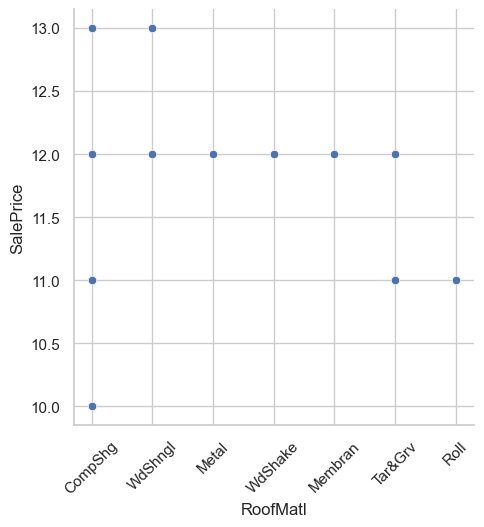

In [258]:
# Set the style of the plot
sns.set(style="whitegrid")

# Create a relational plot
sns.relplot(data=df, x='RoofMatl', y='SalePrice', kind='scatter')

# Rotate the x-axis labels for better readability
plt.xticks(rotation=45)

# Display the plot

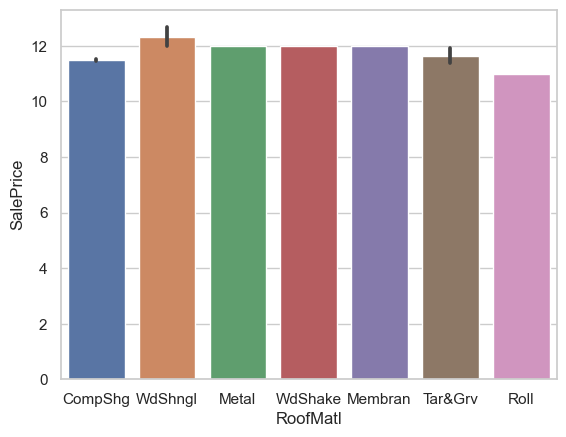

In [259]:
sns.barplot(data=df, x='RoofMatl', y="SalePrice")
plt.show()

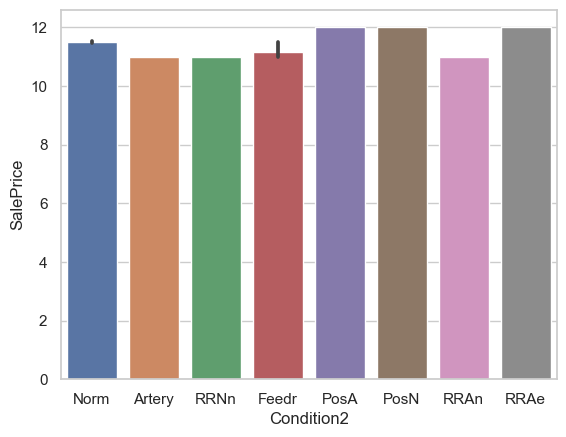

In [260]:
sns.barplot(data=df, x='Condition2', y="SalePrice")
plt.show()

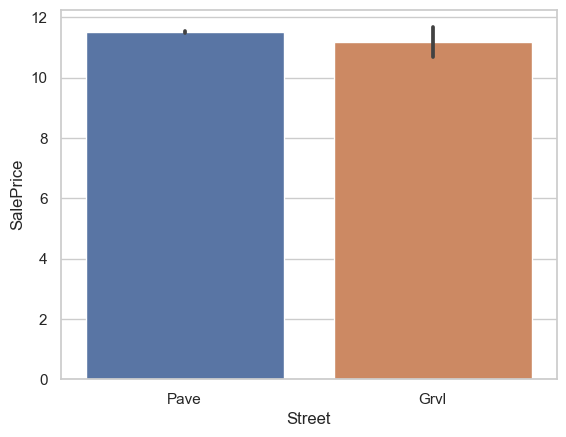

In [261]:
sns.barplot(data=df, x='Street', y="SalePrice")
plt.show()
# only pave strret more and no relationship with sale price

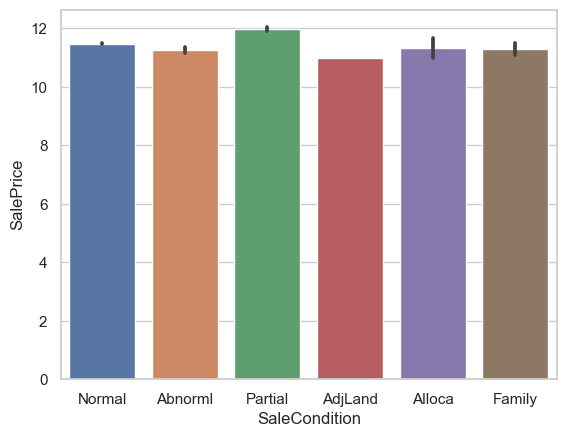

In [262]:
sns.barplot(x='SaleCondition',y='SalePrice',data=df)
plt.show()
# no relationship 

In [263]:
df['Utilities'].value_counts()

Utilities
AllPub    1452
NoSeWa       1
Name: count, dtype: int64

In [264]:
df.drop(columns='Utilities',inplace=True,axis=1)
print('Drop Utilities \n')
'''# this categorical Features with >95% of the same value
# these features totaly nosewa having only one value so it is no use for category '''
# why drop this Utilities column -because this column contain only one category Allpub
# in most cases we drop it ,because it not not giving useful information for output

Drop Utilities 



'# this categorical Features with >95% of the same value\n# these features totaly nosewa having only one value so it is no use for category '

In [265]:
# Drop specified columns
drop_columns = ['MiscVal', 'OverallCond', 'GarageCars', 'BedroomAbvGr', 'KitchenAbvGr', 'BsmtQual', 'GarageQual', 'Street', 'Heating', 'RoofMatl']
df.drop(columns=drop_columns, inplace=True, errors='ignore')
print('Drop MiscVal, OverallCond, GarageCars, BedroomAbvGr, KitchenAbvGr, BsmtQual, GarageQual, Street, Heating, RoofMatl columns.\n')

# Drop 'Condition2' column
df.drop(columns=['Condition2'], inplace=True, errors='ignore')
print("Drop Condition2 column.\n")

# Print the shape of the DataFrame after dropping columns
print("DataFrame shape:", df.shape)

Drop MiscVal, OverallCond, GarageCars, BedroomAbvGr, KitchenAbvGr, BsmtQual, GarageQual, Street, Heating, RoofMatl columns.

Drop Condition2 column.

DataFrame shape: (1453, 52)


- from above poolarea , MiscVal,screenporch , enclosedporch ,openporch,ScreenPorch - contains large number of
zeros so i decided to drop these columns.or adding all zeros columns make new columns # garage cars or garage
area same ,means garage cars not affecting the prize. if garage area is more according to that we can accomodate
number of cars . # # 'BedroomAbvGr','KitchenAbvGr' should drop because totalroomsgr showing same property- 
# OverallQual: Overall material and finish quality OverallCond: Overall condition rating drop 1 add - , garage cars
drop # categorical columns BsmtQual & BsmtCond both shows same categories , both highly correlated with each
other so drop any 1 . # same for GarageQual& GarageCond same property so drop any 1. # DROP -'Street'
column because this column contain Pave category more it constant value 6 value of grvl street. so i drop it

#### 5. FEATURE ENCODING
We need to convert these categorical variables to numbers such that the model is able to
understand and extract valuable information- .
Two types of categorical da--ta
Ordinal Data: The categories have an inherent or--der
Nominal Data: The categories do not have an inherent order
###ENCODING : Categorical columns into numerical columns. - PERFORME LABEL CODING ON LESS CAT-EGORY
COLUMNS OR MAP WITH O AND 1 VALUE - Perform ordinal encoding only on - ordinal columns - fre-quency
encoding - when large no. of categories is there no ordinal only nominal values are there : # we can -perform
ColumnTranformer class - for scaling encoding numerical as well as categorical colum and to fit tranform # r

In [266]:
df_ = df.select_dtypes(exclude=['int', 'float']) # excluding numerical columns
num_categorical_columns = len(df_.columns)

for x in range(num_categorical_columns): # iterate over the categorical columns
    print ("---- {} ---".format(df_.columns[x]))
    print("Null count:", df_.iloc[:, x].isnull().sum()) # also print null values are not
    print(df_.iloc[:, x].value_counts(dropna=False).sort_index(ascending=True))
    print()


---- MSZoning ---
Null count: 0
MSZoning
C (all)      10
FV           65
RH           16
RL         1144
RM          218
Name: count, dtype: int64

---- LotShape ---
Null count: 0
LotShape
IR1    481
IR2     41
IR3      9
Reg    922
Name: count, dtype: int64

---- LandContour ---
Null count: 0
LandContour
Bnk      61
HLS      50
Low      35
Lvl    1307
Name: count, dtype: int64

---- LotConfig ---
Null count: 0
LotConfig
Corner      262
CulDSac      94
FR2          47
FR3           4
Inside     1046
Name: count, dtype: int64

---- LandSlope ---
Null count: 0
LandSlope
Gtl    1376
Mod      64
Sev      13
Name: count, dtype: int64

---- Neighborhood ---
Null count: 0
Neighborhood
Blmngtn     17
Blueste      2
BrDale      16
BrkSide     58
ClearCr     28
CollgCr    150
Crawfor     51
Edwards     98
Gilbert     79
IDOTRR      37
MeadowV     17
Mitchel     48
NAmes      225
NPkVill      9
NWAmes      73
NoRidge     40
NridgHt     74
OldTown    113
SWISU       25
Sawyer      74
SawyerW     5

In [267]:
from sklearn.preprocessing import LabelEncoder

#### Transform Numerical Variables to Categorical Variables:

In [268]:
num_cat = ['MSSubClass']
for col in num_cat:
 df[col] = df[col].apply(str)

Because I have calculated age of houses, YearBuilt is no longer needed. However, YrSold could have a large impact
on house price Therefore, I will transform it into categorical variables. Like YrSold, some numerical variables don't
have any ordinal meaning (e.g. MSSubClass). I will transform them into categorical variables.

In [269]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
LotFrontage,1453.0,69.055747,12.917424,49.000000,60.000000,69.000000,79.000000,91.000000
LotArea,1453.0,9555.064831,2811.326155,5000.000000,7535.000000,9453.000000,11553.000000,14226.400000
OverallQual,1453.0,6.088782,1.371077,1.000000,5.000000,6.000000,7.000000,10.000000
MasVnrArea,1453.0,101.887130,179.223197,0.000000,0.000000,0.000000,162.000000,1600.000000
BsmtUnfSF,1453.0,564.580179,438.550601,0.000000,223.000000,474.000000,806.000000,2336.000000
GrLivArea,1453.0,7.265426,0.329573,5.814131,7.029088,7.285507,7.482119,8.406708
TotRmsAbvGrd,1453.0,6.504474,1.612883,2.000000,5.000000,6.000000,7.000000,14.000000
Fireplaces,1453.0,0.609085,0.641731,0.000000,0.000000,1.000000,1.000000,3.000000
GarageArea,1453.0,470.340674,209.602757,0.000000,328.000000,478.000000,576.000000,1248.000000
MoSold,1453.0,6.324157,2.700413,1.000000,5.000000,6.000000,8.000000,12.000000


In [270]:
df.describe(include='O').T

,count,unique,top,freq
MSSubClass,1453,15,20,532
MSZoning,1453,5,RL,1144
LotShape,1453,4,Reg,922
LandContour,1453,4,Lvl,1307
LotConfig,1453,5,Inside,1046
LandSlope,1453,3,Gtl,1376
Neighborhood,1453,25,NAmes,225
Condition1,1453,9,Norm,1255
BldgType,1453,5,1Fam,1214
HouseStyle,1453,8,1Story,721


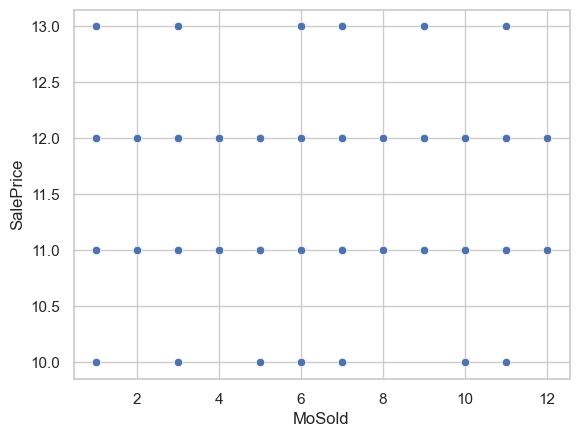

In [271]:
# no use of month sold
sns.scatterplot(x="MoSold",y="SalePrice",data=df)
plt.show()# no relationship between MoSold and SalePrice every mothe sale price 

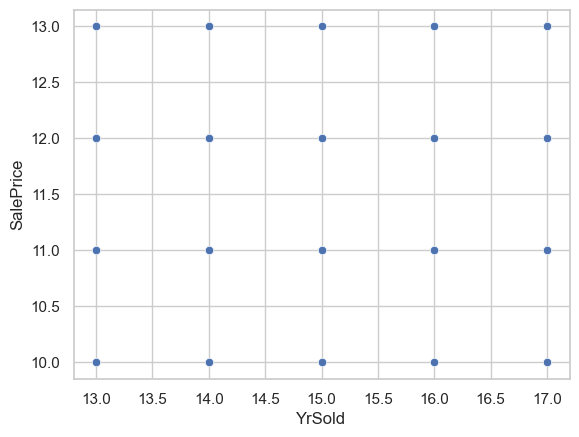

In [272]:
sns.scatterplot(x="YrSold",y="SalePrice",data=df)
plt.show()
# every year house saled with prize no realtionship . so i drop it.

In [273]:
df.drop(['MoSold'], axis=1, inplace=True)
df.drop(['YrSold'], axis=1, inplace=True)
print(df.shape)
''' no relationship with sale price so we dropped it.'''

(1453, 50)


' no relationship with sale price so we dropped it.'

In [274]:
##identifying categorical variables
categorical2 = df.select_dtypes(include=['object'])
categorical2 = categorical2.columns


In [275]:
len(categorical2)

32

In [276]:
from sklearn.preprocessing import LabelEncoder # import LabelEncoder

In [277]:
# Ordinal categorical columns
label_encoding_cols = [
 "BsmtCond", "BsmtExposure", "BsmtFinType1", "BsmtFinType2",
 "ExterCond", "ExterQual", "Functional","CentralAir",
 "HeatingQC", "KitchenQual", "LandSlope","Electrical",
 "LotShape", "PavedDrive","GarageFinish","GarageCond"
]
# Apply Label Encoder
label_encoder = LabelEncoder()
for col in label_encoding_cols:
 df[col] = label_encoder.fit_transform(df[col])

In [278]:
# we can drop central air , heatingqc because functional columns shows same property
# but applied later after scaling check the correaltion highest correalted featurec.
'''MSZoning','MsSubClass' 'LandContour', 'LotConfig',
 'Neighborhood', 'Condition1', 'BldgType', 'HouseStyle', 'RoofStyle',
 'Exterior1st', 'Exterior2nd', 'MasVnrType',
 'Foundation', 'GarageType', ,
 'SaleType', 'SaleCondition' '''

"MSZoning','MsSubClass' 'LandContour', 'LotConfig',\n 'Neighborhood', 'Condition1', 'BldgType', 'HouseStyle', 'RoofStyle',\n 'Exterior1st', 'Exterior2nd', 'MasVnrType',\n 'Foundation', 'GarageType', ,\n 'SaleType', 'SaleCondition' "

- All above nominal features contains large categories more than 10 so using One Hot Encoding ,redudant
columns are increases Next we move to perform Target Encoding. # In Target Encoding a categorical value is
substituted with the mean value of the target variable for this specific categorical variable in the training set # We
follow this approach as one-hot encoding would create a lot of extra columns and would increase considerably
the computational cost of our model. We fit only on the training set in order not to have data leakage. For this
method we would have also not other option as for the test set we do not know the target value. However, we
could have used other options like Label Encoding and test the best one in a cross validation set. # Prefer ordinal
coding or label encoding on some columns and target encoding on some remaning columns.


In [279]:
df.shape

(1453, 50)

In [280]:
cat_cols_n = df.select_dtypes(include=['object']).columns
cat_cols_n


Index(['MSSubClass', 'MSZoning', 'LandContour', 'LotConfig', 'Neighborhood',
       'Condition1', 'BldgType', 'HouseStyle', 'RoofStyle', 'Exterior1st',
       'Exterior2nd', 'MasVnrType', 'Foundation', 'GarageType', 'SaleType',
       'SaleCondition'],
      dtype='object')

- Use Target Encoding :

In [281]:
 ! pip install --upgrade category_encoders

In [282]:
#Target encoder :
import category_encoders as ce # target encoder
enc=ce.TargetEncoder()

In [283]:
df[cat_cols_n]=enc.fit_transform(df[cat_cols_n],df['SalePrice'])
''' Applied Target Encoding'''

' Applied Target Encoding'

In [284]:
pd.concat([df,df[cat_cols_n]],axis=1)

,MSSubClass,MSZoning,LotFrontage,LotArea,LotShape,LandContour,LotConfig,LandSlope,Neighborhood,Condition1,BldgType,HouseStyle,OverallQual,RoofStyle,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinType2,BsmtUnfSF,HeatingQC,CentralAir,Electrical,GrLivArea,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,GarageType,GarageFinish,GarageArea,GarageCond,PavedDrive,SaleType,SaleCondition,SalePrice,HouseAge,YearRemodel,GarageAge,TotalSF,Bsmt,TotalBathroom,BsmtBath,TotalPorch,MSSubClass,MSZoning,LandContour,LotConfig,Neighborhood,Condition1,BldgType,HouseStyle,RoofStyle,Exterior1st,Exterior2nd,MasVnrType,Foundation,GarageType,SaleType,SaleCondition
Id,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
1,11.969697,11.576049,65.0,8450.0,3,11.503443,11.479924,0,11.720000,11.525100,11.531301,11.744921,7,11.481124,11.746094,11.752495,11.464231,196,2,4,11.823713,3,3,2,5,150,0,1,4,7.444833,2,8,6,0,11.614165,1,548,4,2,11.467933,11.482412,12,5,20,20,2566,706,2.5,1.0,61,11.969697,11.576049,11.503443,11.479924,11.720000,11.525100,11.531301,11.744921,11.481124,11.746094,11.752495,11.464231,11.823713,11.614165,11.467933,11.482412
2,11.479323,11.576049,80.0,9600.0,3,11.503443,11.530100,0,11.620450,11.238157,11.531301,11.439667,6,11.481124,11.264840,11.262911,11.464231,0,3,4,11.276461,3,1,0,5,284,0,1,4,7.141245,3,6,6,1,11.614165,1,460,4,2,11.467933,11.482412,12,31,47,47,2524,978,2.0,0.5,298,11.479323,11.576049,11.503443,11.530100,11.620450,11.238157,11.531301,11.439667,11.481124,11.264840,11.262911,11.464231,11.276461,11.614165,11.467933,11.482412
3,11.969697,11.576049,68.0,11250.0,0,11.503443,11.479924,0,11.720000,11.525100,11.531301,11.744921,7,11.481124,11.746094,11.752495,11.464231,162,2,4,11.823713,3,2,2,5,434,0,1,4,7.488294,2,6,6,1,11.614165,1,608,4,2,11.467933,11.482412,12,7,21,22,2706,486,2.5,1.0,42,11.969697,11.576049,11.503443,11.479924,11.720000,11.525100,11.531301,11.744921,11.481124,11.746094,11.752495,11.464231,11.823713,11.614165,11.467933,11.482412
4,11.401854,11.576049,60.0,9550.0,0,11.503443,11.503817,0,11.715903,11.525100,11.531301,11.744921,7,11.481124,11.281553,11.364942,11.464231,0,3,4,11.164385,1,3,0,5,540,2,1,4,7.448916,2,7,6,1,11.149871,2,642,4,2,11.467933,11.257500,11,91,53,25,2473,216,1.0,1.0,307,11.401854,11.576049,11.503443,11.503817,11.715903,11.525100,11.531301,11.744921,11.481124,11.281553,11.364942,11.464231,11.164385,11.149871,11.467933,11.257500
5,11.969697,11.576049,84.0,14226.4,0,11.503443,11.530100,0,12.028847,11.525100,11.531301,11.744921,8,11.481124,11.746094,11.752495,11.464231,350,2,4,11.823713,3,0,2,5,490,0,1,4,7.695758,2,9,6,1,11.614165,1,836,4,2,11.467933,11.482412,12,8,23,23,3343,655,2.5,1.0,276,11.969697,11.576049,11.503443,11.530100,12.028847,11.525100,11.531301,11.744921,11.481124,11.746094,11.752495,11.464231,11.823713,11.614165,11.467933,11.482412
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1456,11.969697,11.576049,62.0,7917.0,3,11.503443,11.479924,0,11.935524,11.525100,11.531301,11.744921,6,11.481124,11.746094,11.752495,11.464231,0,3,4,11.823713,3,3,5,5,953,0,1,4,7.407318,3,7,6,1,11.614165,1,460,4,2,11.467933,11.482412,12,8,23,24,2600,0,2.5,0.0,40,11.969697,11.576049,11.503443,11.479924,11.935524,11.525100,11.531301,11.744921,11.481124,11.746094,11.752495,11.464231,11.823713,11.614165,11.467933,11.482412
1457,11.479323,11.576049,85.0,13175.0,3,11.503443,11.479924,0,11.779443,11.525100,11.531301,11.439667,6,11.481124,11.546290,11.485916,11.935471,119,3,4,11.276461,3,3,0,4,589,4,1,4,7.637234,3,7,2,2,11.614165,2,500,4,2,11.467933,11.482412,12,32,35,45,3615,953,2.0,1.0,349,11.479323,11.576049,11.503443,11.479924,11.779443,11.525100,11.531301,11.439667,11.481124,11.546290,11.485916,11.935471,11.276461,1

In [285]:
# from above concat columns are duplicates columns so remove it.
df = df.drop_duplicates()
print( df.shape )

(1452, 50)


In [286]:
df # final done encoding 


,MSSubClass,MSZoning,LotFrontage,LotArea,LotShape,LandContour,LotConfig,LandSlope,Neighborhood,Condition1,BldgType,HouseStyle,OverallQual,RoofStyle,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinType2,BsmtUnfSF,HeatingQC,CentralAir,Electrical,GrLivArea,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,GarageType,GarageFinish,GarageArea,GarageCond,PavedDrive,SaleType,SaleCondition,SalePrice,HouseAge,YearRemodel,GarageAge,TotalSF,Bsmt,TotalBathroom,BsmtBath,TotalPorch
Id,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
1,11.969697,11.576049,65.0,8450.0,3,11.503443,11.479924,0,11.720000,11.525100,11.531301,11.744921,7,11.481124,11.746094,11.752495,11.464231,196,2,4,11.823713,3,3,2,5,150,0,1,4,7.444833,2,8,6,0,11.614165,1,548,4,2,11.467933,11.482412,12,5,20,20,2566,706,2.5,1.0,61
2,11.479323,11.576049,80.0,9600.0,3,11.503443,11.530100,0,11.620450,11.238157,11.531301,11.439667,6,11.481124,11.264840,11.262911,11.464231,0,3,4,11.276461,3,1,0,5,284,0,1,4,7.141245,3,6,6,1,11.614165,1,460,4,2,11.467933,11.482412,12,31,47,47,2524,978,2.0,0.5,298
3,11.969697,11.576049,68.0,11250.0,0,11.503443,11.479924,0,11.720000,11.525100,11.531301,11.744921,7,11.481124,11.746094,11.752495,11.464231,162,2,4,11.823713,3,2,2,5,434,0,1,4,7.488294,2,6,6,1,11.614165,1,608,4,2,11.467933,11.482412,12,7,21,22,2706,486,2.5,1.0,42
4,11.401854,11.576049,60.0,9550.0,0,11.503443,11.503817,0,11.715903,11.525100,11.531301,11.744921,7,11.481124,11.281553,11.364942,11.464231,0,3,4,11.164385,1,3,0,5,540,2,1,4,7.448916,2,7,6,1,11.149871,2,642,4,2,11.467933,11.257500,11,91,53,25,2473,216,1.0,1.0,307
5,11.969697,11.576049,84.0,14226.4,0,11.503443,11.530100,0,12.028847,11.525100,11.531301,11.744921,8,11.481124,11.746094,11.752495,11.464231,350,2,4,11.823713,3,0,2,5,490,0,1,4,7.695758,2,9,6,1,11.614165,1,836,4,2,11.467933,11.482412,12,8,23,23,3343,655,2.5,1.0,276
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1456,11.969697,11.576049,62.0,7917.0,3,11.503443,11.479924,0,11.935524,11.525100,11.531301,11.744921,6,11.481124,11.746094,11.752495,11.464231,0,3,4,11.823713,3,3,5,5,953,0,1,4,7.407318,3,7,6,1,11.614165,1,460,4,2,11.467933,11.482412,12,8,23,24,2600,0,2.5,0.0,40
1457,11.479323,11.576049,85.0,13175.0,3,11.503443,11.479924,0,11.779443,11.525100,11.531301,11.439667,6,11.481124,11.546290,11.485916,11.935471,119,3,4,11.276461,3,3,0,4,589,4,1,4,7.637234,3,7,2,2,11.614165,2,500,4,2,11.467933,11.482412,12,32,35,45,3615,953,2.0,1.0,349
1458,11.401854,11.576049,66.0,9042.0,3,11.503443,11.479924,0,11.715903,11.525100,11.531301,11.744921,7,11.481124,11.696458,11.674497,11.464231,0,0,2,11.469515,1,3,2,5,877,0,1,4,7.758333,2,9,6,2,11.614165,1,252,4,2,11.467933,11.482412,12,69,17,82,3492,275,2.0,0.0,60


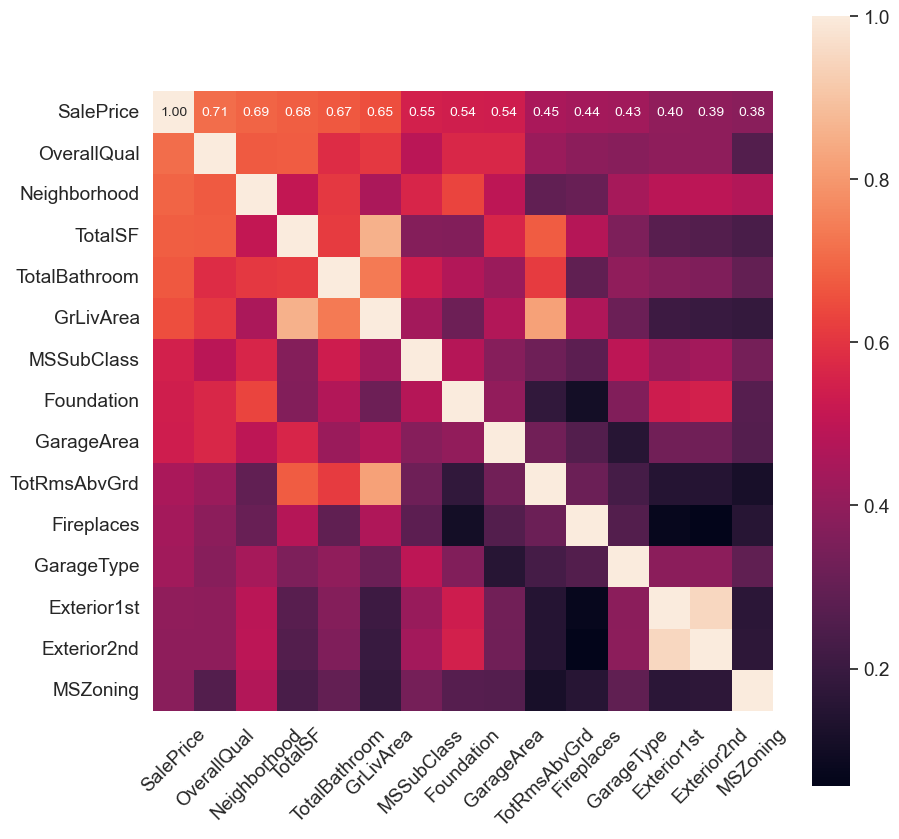

affecting target variable most: Index(['SalePrice', 'OverallQual', 'Neighborhood', 'TotalSF', 'TotalBathroom',
       'GrLivArea', 'MSSubClass', 'Foundation', 'GarageArea', 'TotRmsAbvGrd',
       'Fireplaces', 'GarageType', 'Exterior1st', 'Exterior2nd', 'MSZoning'],
      dtype='object') 15


In [287]:
# SOME COLUMNS ALL STATISTICAL VALUES ARE ZEROS, SO WE CAN DROP
# CHECK CORRELATION:
cor = df.corr()
k = 15  # number of variables for heatmap
cols = cor.nlargest(k, 'SalePrice')['SalePrice'].index
cmt = np.corrcoef(df[cols].values.T)  # correlation matrix
sns.set(font_scale=1.25)
plt.figure(figsize=(10, 10))
hm = sns.heatmap(cmt, cbar=True, annot=True, square=True, fmt='.2f', annot_kws={'size': 10})
hm.set_xticklabels(cols.values, rotation=45)
hm.set_yticklabels(cols.values, rotation=0)
plt.show()
print("affecting target variable most:", cols, len(cols))

In [288]:
# some columns are highly correlated with each other
# TotalSF & GrLivArea, first columns mostly dependent on saleprice so we drop GrLivArea
# TotRmsAbvGrd with GrLivArea - but I drop only GrLivArea
if 'GrLivArea' in df.columns:
    df.drop(['GrLivArea'], axis=1, inplace=True)
    print("GrLivArea column dropped successfully.")
    print("New shape of the DataFrame:", df.shape)
else:
    print("GrLivArea column not found in the DataFrame.")
    print(df.shape)

GrLivArea column dropped successfully.
New shape of the DataFrame: (1452, 49)


In [289]:
if 'LandSlope' in df.columns:
    df.drop(['LandSlope'], axis=1, inplace=True)
    print("LandSlope column dropped successfully.")
    print("New shape of the DataFrame:", df.shape)
else:
    print("LandSlope column not found in the DataFrame.")
    print(df.shape)

LandSlope column dropped successfully.
New shape of the DataFrame: (1452, 48)


In [290]:
df= df.astype('int64') # convert all datatypes into same type i.e int64

In [291]:
#now to check if everything is numerical
print(df.dtypes)

MSSubClass       int64
MSZoning         int64
LotFrontage      int64
LotArea          int64
LotShape         int64
LandContour      int64
LotConfig        int64
Neighborhood     int64
Condition1       int64
BldgType         int64
HouseStyle       int64
OverallQual      int64
RoofStyle        int64
Exterior1st      int64
Exterior2nd      int64
MasVnrType       int64
MasVnrArea       int64
ExterQual        int64
ExterCond        int64
Foundation       int64
BsmtCond         int64
BsmtExposure     int64
BsmtFinType1     int64
BsmtFinType2     int64
BsmtUnfSF        int64
HeatingQC        int64
CentralAir       int64
Electrical       int64
KitchenQual      int64
TotRmsAbvGrd     int64
Functional       int64
Fireplaces       int64
GarageType       int64
GarageFinish     int64
GarageArea       int64
GarageCond       int64
PavedDrive       int64
SaleType         int64
SaleCondition    int64
SalePrice        int64
HouseAge         int64
YearRemodel      int64
GarageAge        int64
TotalSF    

#### After encoding check skewness then apply log 
TRANSFORMATION.

In [292]:
from sklearn.preprocessing import StandardScaler

# Skewness of columns
skewness = [
    df['LotArea'].skew(),
    df['MasVnrArea'].skew(),
    df['BsmtUnfSF'].skew(),
    df['TotalSF'].skew(),
    df['TotalPorch'].skew()
]

# Print skewness
print("Skewness of columns:")
for col, skew in zip(['LotArea', 'MasVnrArea', 'BsmtUnfSF', 'TotalSF', 'TotalPorch'], skewness):
    print(f"{col}: {skew}")

# Scale the columns directly
scaler = StandardScaler()
columns_to_scale = ['LotArea', 'MasVnrArea', 'BsmtUnfSF', 'TotalSF', 'TotalPorch']
df[columns_to_scale] = scaler.fit_transform(df[columns_to_scale])

# Print scaled columns
print("\nScaled columns:")
print(df[columns_to_scale])


Skewness of columns:
LotArea: 0.0687263952195317
MasVnrArea: 2.702414295552311
BsmtUnfSF: 0.9086598369978268
TotalSF: 0.7236219960520385
TotalPorch: 1.1358860589214363

Scaled columns:
       LotArea  MasVnrArea  BsmtUnfSF   TotalSF  TotalPorch
Id                                                         
1    -0.394544    0.524931  -0.944983  0.021618   -0.751826
2     0.014896   -0.568709  -0.639341 -0.033543    0.782428
3     0.602354    0.335218  -0.297205  0.205490   -0.874825
4    -0.002906   -0.568709  -0.055428 -0.100526    0.840691
5     1.661913    1.384220  -0.169474  1.042109    0.640008
...        ...         ...        ...       ...         ...
1456 -0.584311   -0.568709   0.886588  0.066273   -0.887772
1457  1.287721    0.095287   0.056336  1.399347    1.112584
1458 -0.183771   -0.568709   0.713238  1.237802   -0.758299
1459  0.056552   -0.568709  -1.287120 -0.516865    1.947685
1460  0.134880   -0.568709  -0.976916 -0.049304    4.058093

[1452 rows x 5 columns]


' no need do log transformation directly do scaling '

Split the data ,then do scaling data only on input variables. 
then apply regression model

In [293]:
!pip install xgboost

In [294]:
# split train and test set
from sklearn.model_selection import train_test_split
# import the sklearn libraries
from sklearn.preprocessing import RobustScaler # Robust scaler ()
from sklearn.linear_model import LinearRegression, Lasso, Ridge # Linear regression mo
from sklearn.ensemble import RandomForestRegressor
import xgboost as xgb
from sklearn import ensemble
from sklearn.ensemble import RandomForestRegressor
# calculatae error :
from sklearn.metrics import mean_squared_error, mean_absolute_error
from sklearn.metrics import r2_score # check score for evaluation 

In [295]:
#Sepearate depdent and indepedent features
X=df.drop('SalePrice',axis=1) # indepdent features
y=df['SalePrice'] # Dependent features.
X.shape # 1452 rows and 45 columns 

(1452, 47)

In [296]:
y.shape

(1452,)

### Scaling : Robust scaler() or Satandard scaler ()- 
RobustScaler is a transformation technique that removes the median and scales the data    according to the quantil 
range (defaults to IQR: Interquartile Range
- . The IQR is the range between the 1st quartile (25th quantile) and t e
3rd quart        le (75th quantil
- ). It is also robust to outliers, which makes it ideal for data where there are too m     ny
outliers that will drastically reduce the number of training data.

In [297]:
# Initialize the Robust Scaler
scaler = RobustScaler()
#Fit and transform the training features using the Robust Scaler
X_scaled = scaler.fit_transform(X)
'''Scaled all indepdent features then split the data'''

'Scaled all indepdent features then split the data'

In [298]:
X_scaled.shape

(1452, 47)

#### 4.Feature Selection : RFE

In [299]:
from sklearn.feature_selection import RFE

In [300]:
# Feature Selection using Linear Regression
model = LinearRegression()
rfe = RFE(model, n_features_to_select=15) # Adjust the number of features as needed
X_selected = rfe.fit_transform(X_scaled, y)
selected_feature_names = np.array(X.columns)[rfe.support_]

In [301]:
selected_feature_names

array(['MSSubClass', 'LotArea', 'LotShape', 'Neighborhood', 'OverallQual',
       'BsmtUnfSF', 'HeatingQC', 'CentralAir', 'Functional', 'Fireplaces',
       'HouseAge', 'YearRemodel', 'TotalSF', 'TotalBathroom',
       'TotalPorch'], dtype=object)

In [302]:
print("length of SELECTED RFE FEATURES:",len(selected_feature_names ))

length of SELECTED RFE FEATURES: 15


#### Split the dataset into test and train samples

In [303]:
# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_selected, y, test_size=0.2, random_state=42)

#### 5. MODEL Creation : Apply regression models
- Linear Regressoin ,lasso, ridge regressor
- Random forest regressor, xgboostregressor
- Ensemble all model together for simplification
- Evaluation model - calculate errors, and r2 score etc
- Select best model for hyperparameter tunig
- Create model with hypertuning - GridSearchCV
-  except Linear Regression

In [304]:
from sklearn.model_selection import train_test_split, GridSearchCV

In [305]:
# Hyperparameter Tuning for Lasso Regression
lasso = Lasso()
param_grid_lasso = {
 'alpha': [0.01, 0.1, 1.0, 10.0]
}
grid_search_lasso = GridSearchCV(estimator=lasso, param_grid=param_grid_lasso, cv=5)
grid_search_lasso.fit(X_train, y_train) # already x train scaled before spliting the d
best_lasso = grid_search_lasso.best_estimator_

In [306]:
#Hyperparameter Tuning for Ridge Regression
ridge = Ridge()
param_grid_ridge = {
 'alpha': [0.01, 0.1, 1.0, 10.0]
}
grid_search_ridge = GridSearchCV(estimator=ridge, param_grid=param_grid_ridge, cv=5)
grid_search_ridge.fit(X_train, y_train) # already x train scaled before spliting the d
best_ridge = grid_search_ridge.best_estimator_

In [307]:
# Hyperparameter Tuning for Random Forest
rf = RandomForestRegressor()
param_grid_rf = {
 'n_estimators': [100, 200, 300],
 'max_depth': [None, 10, 20]
}
grid_search_rf = GridSearchCV(estimator=rf, param_grid=param_grid_rf, cv=5)
grid_search_rf.fit(X_train, y_train)
best_rf = grid_search_rf.best_estimator_

In [308]:
from xgboost import XGBRegressor 

In [309]:
#Hyperparameter Tuning for XGBoost Regression
xgb = XGBRegressor()
param_grid_xgb = {
 'learning_rate': [0.01, 0.1, 0.3],
 'max_depth': [3, 5, 7],
 'n_estimators': [100, 200, 300]
}
grid_search_xgb = GridSearchCV(estimator=xgb, param_grid=param_grid_xgb, cv=5)
grid_search_xgb.fit(X_train, y_train)
best_xgb = grid_search_xgb.best_estimator_

#### 6. Evaluate the models on the test set

In [310]:
y_pred_lasso = best_lasso.predict(X_test) # predict lasso
y_pred_ridge = best_ridge.predict(X_test) # predict ridge
y_pred_xgb = best_xgb.predict(X_test) # predict xgb
y_pred_rf = best_rf.predict(X_test)# predict rf

- check r2 score

In [311]:
#R2 score of each model :
r2_lasso = r2_score(y_test, y_pred_lasso)
r2_ridge = r2_score(y_test, y_pred_ridge)
r2_xgb = r2_score(y_test, y_pred_xgb)
r2_rf = r2_score(y_test, y_pred_rf)

In [312]:
print("R2 Score - Random Forest:", r2_rf)
print("R2 Score - Lasso Regression:", r2_lasso)
print("R2 Score - Ridge Regression:", r2_ridge)
print("R2 Score - XGBoost Regression:", r2_xgb)

R2 Score - Random Forest: 0.7301859720169956
R2 Score - Lasso Regression: 0.6872421424609827
R2 Score - Ridge Regression: 0.6923833643625554
R2 Score - XGBoost Regression: 0.7378250900157035


- Loss function caluculation - MSE,RMSE,MAE

In [313]:
mse_lasso = mean_squared_error(y_test, y_pred_lasso)
rmse_lasso = np.sqrt(mse_lasso)
mae_lasso = mean_absolute_error(y_test, y_pred_lasso)
print("Lasso Regression LOSS:")
print(f" mse_lasso(MSE): {mse_lasso:.2f}")
print(f" rmse_lasso (RMSE): {rmse_lasso:.2f}")
print(f" mae_lasso (MAE): {mae_lasso:.2f}")

Lasso Regression LOSS:
 mse_lasso(MSE): 0.09
 rmse_lasso (RMSE): 0.29
 mae_lasso (MAE): 0.23


In [314]:
mse_ridge = mean_squared_error(y_test, y_pred_ridge)
rmse_ridge = np.sqrt(mse_ridge)
mae_ridge = mean_absolute_error(y_test, y_pred_ridge)
r2_ridge = r2_score(y_test, y_pred_ridge)
print("Ridge Regression loss:")
print(f" mse_ridge(MSE): {mse_ridge:.2f}")
print(f" rmse_ridge (RMSE): {rmse_ridge:.2f}")
print(f" mae_ridge (MAE): {mae_ridge:.2f}")
print(f"r2_ridge (R2): {r2_ridge:.2f}")

Ridge Regression loss:
 mse_ridge(MSE): 0.08
 rmse_ridge (RMSE): 0.29
 mae_ridge (MAE): 0.22
r2_ridge (R2): 0.69


In [315]:
mse_rf = mean_squared_error(y_test, y_pred_rf)
rmse_rf = np.sqrt(mse_rf)
mae_rf = mean_absolute_error(y_test, y_pred_rf)
r2_rf = r2_score(y_test, y_pred_rf)
print("Random Forest loss :")
print(f"mse_rf (MSE): {mse_rf:.2f}")
print(f" rmse_rf_ridge (RMSE): {rmse_rf:.2f}")
print(f" mae_rf (MAE): {mae_rf:.2f}")
print(f"r2_rf (R2): {r2_rf:.2f}")


Random Forest loss :
mse_rf (MSE): 0.07
 rmse_rf_ridge (RMSE): 0.27
 mae_rf (MAE): 0.14
r2_rf (R2): 0.73


In [316]:
mse_xgb = mean_squared_error(y_test, y_pred_xgb)
rmse_xgb = np.sqrt(mse_xgb)
mae_xgb = mean_absolute_error(y_test, y_pred_xgb)
r2_xgb = r2_score(y_test, y_pred_xgb)
print("XGBoost model loss:")
print(f"mse_xgb (MSE): {mse_xgb:.2f}")
print(f" rmse_xgb (RMSE): {rmse_xgb:.2f}")
print(f" mae_xgb (MAE): {mae_xgb:.2f}")
print(f"r2_xgb (R2): {r2_xgb:.2f}")

XGBoost model loss:
mse_xgb (MSE): 0.07
 rmse_xgb (RMSE): 0.27
 mae_xgb (MAE): 0.17
r2_xgb (R2): 0.74


In [317]:
# Compare the models based on their evaluation metrics
models = ["Lasso Regression", "Ridge Regression", "Random Forest", "XGBoost"]
mse_scores = [mse_lasso, mse_ridge, mse_rf, mse_xgb]
rmse_scores = [rmse_lasso, rmse_ridge, rmse_rf, rmse_xgb]
mae_scores = [mae_lasso, mae_ridge, mae_rf, mae_xgb]
r2_scores = [r2_lasso, r2_ridge, r2_rf, r2_xgb]

In [318]:
print("Model Comparison based on Evaluation Metrics:")
print("{:<20} {:<12} {:<12} {:<12} {:<12}".format("Model", "MSE", "RMSE", "MAE", "R2 Score"))

for model, mse_score, rmse_score, mae_score, r2_score in zip(models, mse_scores, rmse_scores, mae_scores, r2_scores):
    print("{:<20} {:<12.2f} {:<12.2f} {:<12.2f} {:<12.2f}".format(model, mse_score, rmse_score, mae_score, r2_score))


Model Comparison based on Evaluation Metrics:
Model                MSE          RMSE         MAE          R2 Score    
Lasso Regression     0.09         0.29         0.23         0.69        
Ridge Regression     0.08         0.29         0.22         0.69        
Random Forest        0.07         0.27         0.14         0.73        
XGBoost              0.07         0.27         0.17         0.74        


#### from above evaluation metrics :

- best moldel is Random forest regression model less erros and r2 score is best
- MSE=0.07 your model is making accurate predictions
- RMSE=0.26 QUITE GOOD
- R2 SCORE-0.76 MEANS RF model explains 76% of the variance in the given dataset.

Select the best model and its features:

In [319]:
# Select the best model and its features
best_model = None
best_r2_score = max(r2_rf, r2_lasso, r2_ridge, r2_xgb)
if best_r2_score == r2_rf:
 best_model = best_rf

elif best_r2_score == r2_lasso:
 best_model = best_lasso

elif best_r2_score == r2_ridge:
 best_model = best_ridge
else:
 best_model = best_xgb

In [320]:
# Placeholder values for selected features (replace these with your actual selected features)
best_features_rf = ['MSSubClass', 'LotArea', 'LotShape', 'Neighborhood','OverallQual', 'YearBuilt', 'YearRemodAdd', 'TotalBsmtSF','GrLivArea', 'GarageCars', 'GarageArea', 'WoodDeckSF','BsmtQual', 'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF']  # Replace with actual selected features for Random Forest
best_features_lasso = ['MSSubClass', 'LotArea', 'LotShape', 'Neighborhood','OverallQual', 'YearBuilt', 'YearRemodAdd', 'TotalBsmtSF','GrLivArea', 'GarageCars', 'GarageArea', 'WoodDeckSF','BsmtQual', 'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF']  # Replace with actual selected features for Lasso Regression
best_features_ridge = ['MSSubClass', 'LotArea', 'LotShape', 'Neighborhood','OverallQual', 'YearBuilt', 'YearRemodAdd', 'TotalBsmtSF','GrLivArea', 'GarageCars', 'GarageArea', 'WoodDeckSF','BsmtQual', 'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF']  # Replace with actual selected features for Ridge Regression
best_features_xgboost = ['MSSubClass', 'LotArea', 'LotShape', 'Neighborhood','OverallQual', 'YearBuilt', 'YearRemodAdd', 'TotalBsmtSF','GrLivArea', 'GarageCars', 'GarageArea', 'WoodDeckSF','BsmtQual', 'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF']  # Replace with actual selected features for XGBoost Regression


In [321]:
#Get the selected features from RFE
selected_features_best_model = np.array(X.columns)[rfe.support_]

In [322]:
print("Best Model:", best_model)

Best Model: XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=0.1, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=3, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=100, n_jobs=None,
             num_parallel_tree=None, random_state=None, ...)


In [323]:
print("Selected Features for Best Model:", selected_features_best_model)

Selected Features for Best Model: ['MSSubClass' 'LotArea' 'LotShape' 'Neighborhood' 'OverallQual'
 'BsmtUnfSF' 'HeatingQC' 'CentralAir' 'Functional' 'Fireplaces' 'HouseAge'
 'YearRemodel' 'TotalSF' 'TotalBathroom' 'TotalPorch']


#### Create a DataFrame with the best features from all models

In [324]:
#Create a DataFrame with the best features from all models
best_features_df = pd.DataFrame({'Selected_Features': selected_features_best_model})


In [325]:
best_features_df # select total 15 features

,Selected_Features
0,MSSubClass
1,LotArea
2,LotShape
3,Neighborhood
4,OverallQual
5,BsmtUnfSF
6,HeatingQC
7,CentralAir
8,Functional
9,Fireplaces


- Residuals of XGB model :
- Plot actual vs. predicted line for the best model

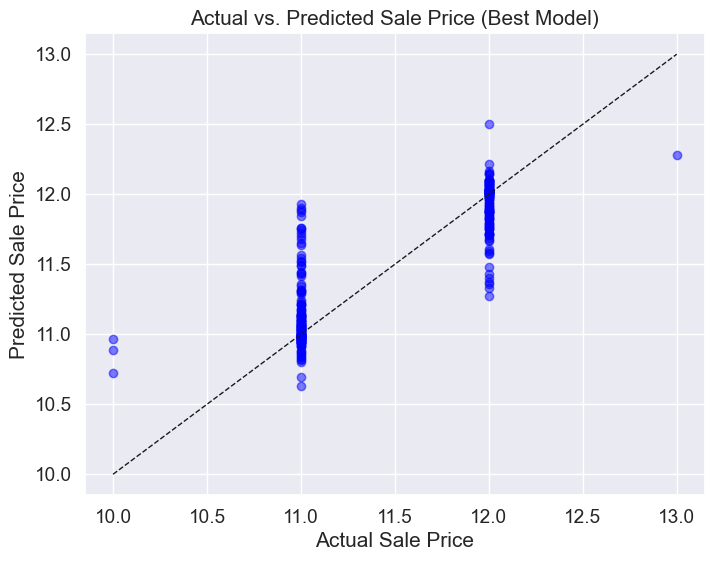

In [326]:
# Plot actual vs. predicted line for the best model
y_pred_best_model = best_model.predict(X_test)
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred_best_model, color='blue', alpha=0.5)
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], 'k--', lw=1)
plt.xlabel('Actual Sale Price')
plt.ylabel('Predicted Sale Price')
plt.title('Actual vs. Predicted Sale Price (Best Model)')
plt.show()

In [327]:
# Create a list of dictionaries containing model names and selected features
models_features = [
    {'Model': 'Random Forest', 'Selected_Features': best_features_rf},
    {'Model': 'Lasso Regression', 'Selected_Features': best_features_lasso},
    {'Model': 'Ridge Regression', 'Selected_Features': best_features_ridge},
    {'Model': 'XGBoost Regression', 'Selected_Features': best_features_xgboost}
]

# Create DataFrame from the list of dictionaries
selected_features_df = pd.DataFrame(models_features)

print("DataFrame with Selected Features from all models:")
print(selected_features_df)

DataFrame with Selected Features from all models:
                Model                                  Selected_Features
0       Random Forest  [MSSubClass, LotArea, LotShape, Neighborhood, ...
1    Lasso Regression  [MSSubClass, LotArea, LotShape, Neighborhood, ...
2    Ridge Regression  [MSSubClass, LotArea, LotShape, Neighborhood, ...
3  XGBoost Regression  [MSSubClass, LotArea, LotShape, Neighborhood, ...


In [328]:
selected_features_df

,Model,Selected_Features
0,Random Forest,"[MSSubClass, LotArea, LotShape, Neighborhood, ..."
1,Lasso Regression,"[MSSubClass, LotArea, LotShape, Neighborhood, ..."
2,Ridge Regression,"[MSSubClass, LotArea, LotShape, Neighborhood, ..."
3,XGBoost Regression,"[MSSubClass, LotArea, LotShape, Neighborhood, ..."


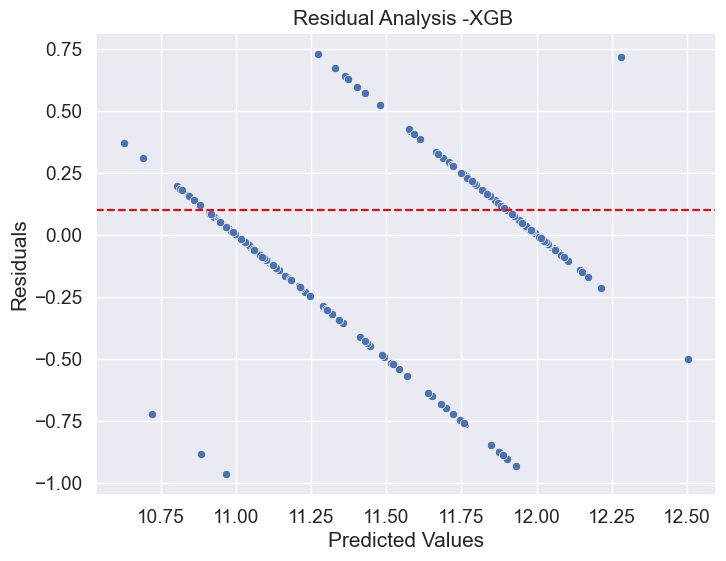

In [329]:
residuals = y_test - y_pred_xgb
plt.figure(figsize=(8, 6))
sns.scatterplot(x=y_pred_xgb, y=residuals)
plt.axhline(y=0.1, color='red', linestyle='--')
plt.xlabel('Predicted Values')
plt.ylabel('Residuals')
plt.title('Residual Analysis -XGB ')
plt.show()


In [330]:
residuals = y_test - y_pred_xgb
print("residualsOR eror in RF MODEL :",residuals)

residualsOR eror in RF MODEL : Id
1042    0.638501
1131   -0.447440
1003   -0.023214
1325   -0.931899
534    -0.722067
          ...   
900     0.051747
1335    0.178387
1417   -0.181931
721     0.166111
255    -0.212085
Name: SalePrice, Length: 291, dtype: float64


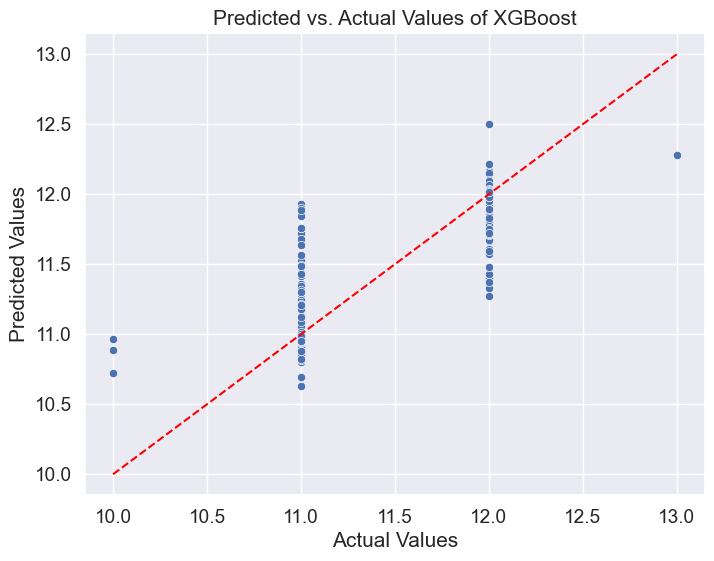

In [331]:
# Predicted vs. Actual Plot using Seaborn
plt.figure(figsize=(8, 6))
sns.scatterplot(x=y_test, y=y_pred_xgb)
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', linestyle='--')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('Predicted vs. Actual Values of XGBoost')
plt.show()


SUMMARY :

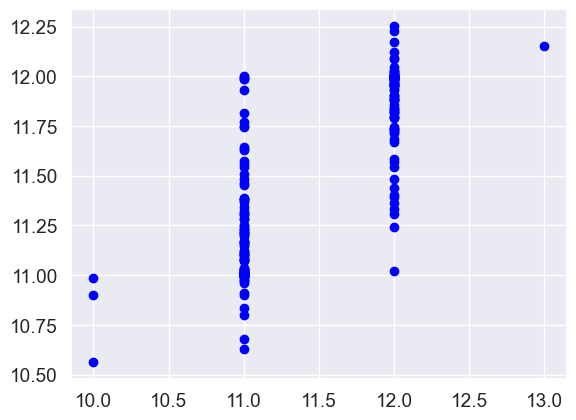

In [332]:
plt.scatter(y_test, y_pred_rf, color='blue', label='Linear Regression')

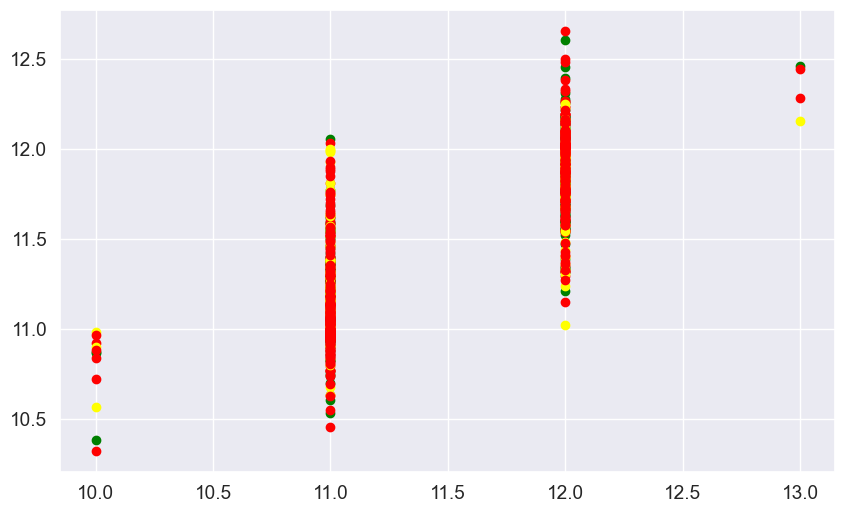

In [333]:
# Plot the line graph for each regression model
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred_lasso, color='green', label='Lasso Regression')
plt.scatter(y_test, y_pred_ridge, color='red', label='Ridge Regression')
plt.scatter(y_test, y_pred_rf, color="yellow",label='Random Forest Regression')
plt.scatter(y_test, y_pred_xgb, color="red",label='XGBoost Regression')
plt.show()

In [334]:

# Create a DataFrame with predicted prices for each model
results_df = pd.DataFrame({
    "Actual Prices": y_test,
    "Lasso Regression": y_pred_lasso,
    "Ridge Regression": y_pred_ridge,
    "Random Forest": y_pred_rf,
    "XGBoost": y_pred_xgb
})

print("DataFrame with Predicted Prices for Each Model:")
print(results_df)

DataFrame with Predicted Prices for Each Model:
      Actual Prices  Lasso Regression  Ridge Regression  Random Forest  \
Id                                                                       
1042             12         11.314867         11.295569      11.439001   
1131             11         11.377583         11.341950      11.385198   
1003             12         12.078791         12.102902      11.999920   
1325             11         12.058519         12.031912      11.999863   
534              10         10.381089         10.321244      10.563333   
...             ...               ...               ...            ...   
900              11         11.182133         11.135907      11.000000   
1335             11         10.977295         10.889074      10.996667   
1417             11         11.137114         11.115096      11.101079   
721              12         11.933670         11.949127      11.967621   
255              11         11.166521         11.118041      11.

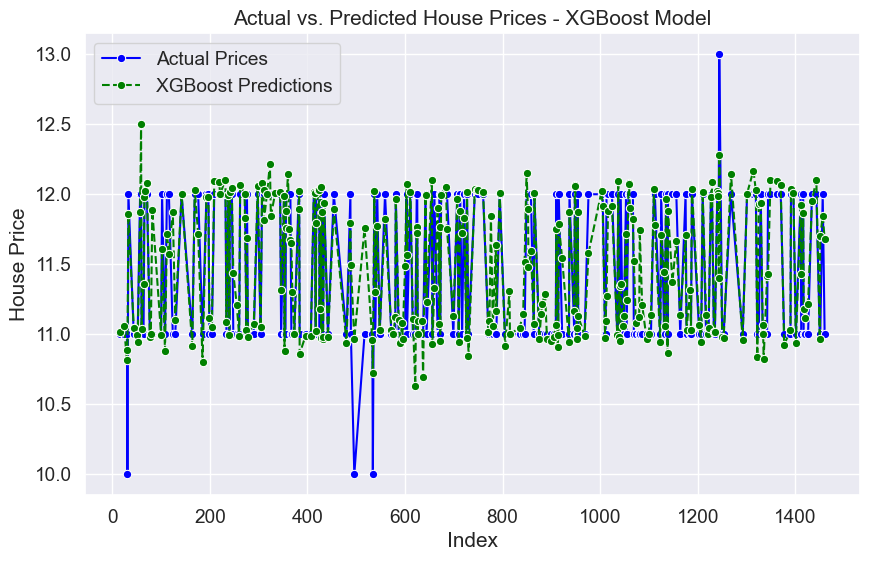

In [335]:
plt.figure(figsize=(10, 6))
sns.lineplot(data=results_df['Actual Prices'], label='Actual Prices', marker='o', color='blue')
sns.lineplot(data=results_df['XGBoost'], label='XGBoost Predictions', marker='o', color='green', linestyle='--')
plt.xlabel('Index')
plt.ylabel('House Price')
plt.title('Actual vs. Predicted House Prices - XGBoost Model')
plt.legend()
plt.grid(True)
plt.show()


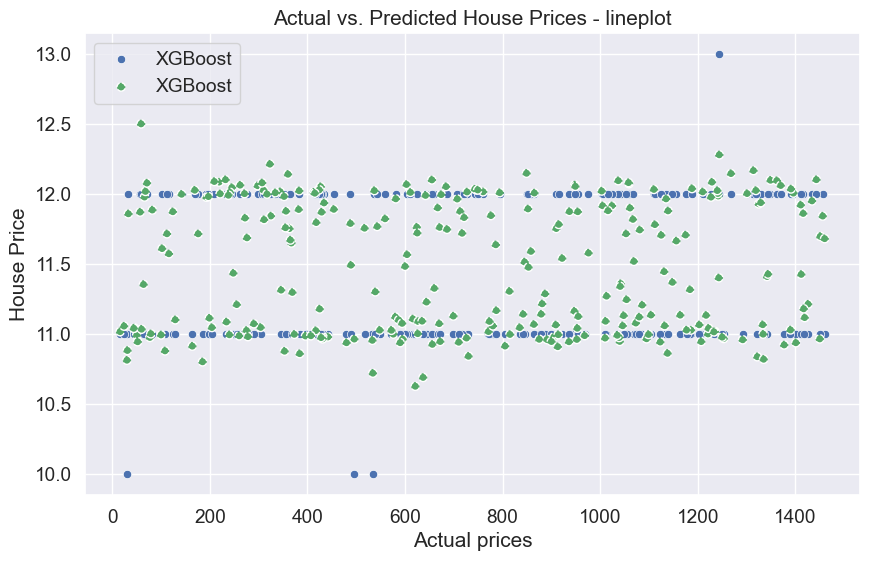

In [336]:
plt.figure(figsize=(10, 6))

sns.scatterplot(data=results_df['Actual Prices'],label='XGBoost',marker='o',color='b')
sns.scatterplot(data=results_df['XGBoost'],label='XGBoost',marker='o',color='g',linewidth=1,linestyle='--')
plt.xlabel('Actual prices')

plt.ylabel('House Price')

plt.title('Actual vs. Predicted House Prices - lineplot')

plt.legend()

plt.grid(True)

plt.show()

In the data analysis process, an exploratory data analysis (EDA) was conducted to examine the dataset. During this
phase, certain low-impact data points were identified and subsequently removed from consideration. In the
feature engineering (FE) phase, new data was generated and incorporated into the dataset to enhance its
predictive capabilities. Following the FE stage, a suitable model was selected based on the characteristics of the
data. Through rigorous experimentation, appropriate parameters were determined for the chosen model, ensuring
optimal performance. Subsequently, the model was built using the finalized dataset and the identified parameters.
Perform additional feature engineering (FE) experiments to enhance the quality of the features. Explore the
implementation of XGBoost and RandomForestRegressor models, considering their suitability for the dataset.
Fine-tune the model parameters to achieve more accurate predictions)

#### Summary :
1) from above results XGboost regressor model is best model
2) then Random forest regressor model .
3) The ideal ‘r2_score’ of a build should be more than 0.73 (at least > 0.60)